# Importing the necessary libraries 

In [1]:
import pandas as pd 
import numpy as np
import warnings 
import matplotlib.pyplot as plt
import scipy.stats
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

# Step - 1: Data Acquisition and Inspection

## Loading the dataset

In [2]:
df = pd.read_csv("health.csv")

## Initial Inspection 

In [3]:
# Inspect the structure and data types of the dataset
dataset_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104272 entries, 0 to 104271
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   YearStart                   104272 non-null  int64  
 1   YearEnd                     104272 non-null  int64  
 2   LocationAbbr                104272 non-null  object 
 3   LocationDesc                104272 non-null  object 
 4   Datasource                  104272 non-null  object 
 5   Class                       104272 non-null  object 
 6   Topic                       104272 non-null  object 
 7   Question                    104272 non-null  object 
 8   Data_Value_Unit             88872 non-null   float64
 9   Data_Value_Type             104272 non-null  object 
 10  Data_Value                  93505 non-null   float64
 11  Data_Value_Alt              93505 non-null   float64
 12  Data_Value_Footnote_Symbol  10767 non-null   object 
 13  Data_Value_Foo

In [4]:
# To get the number of rows , column in the daatset
print("Number of Rows in Housing Dataset : " + str(df.shape[0]))
print("Number of Columns in Housing Dataset : " + str(df.shape[1]))

Number of Rows in Housing Dataset : 104272
Number of Columns in Housing Dataset : 33


Insights:

1. The dataset contains 104,272 rows and 33 columns.

2. Data types include: 

    int64 for numerical data (e.g., YearStart, YearEnd).

    float64 for numerical data with decimals (e.g., Data_Value, Low_Confidence_Limit).
    
    object for text data (e.g., LocationAbbr, Question, Stratification1).

In [5]:
# Display the first few rows of the dataset
dataset_head = df.head()
dataset_head

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,23.3,23.3,NaN,NaN,16.1,32.4,128.0,NaN,NaN,NaN,NaN,NaN,2 or more races,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,2 or more races,RACE,RACE2PLUS
1,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,35.5,35.5,NaN,NaN,22.7,50.9,63.0,NaN,NaN,NaN,NaN,NaN,Other,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,Other,RACE,RACEOTH
2,2011,2011,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,2011.0,Value,21.7,21.7,NaN,NaN,19.1,24.6,1702.0,NaN,NaN,NaN,Female,NaN,NaN,"(64.845079957001, -147.722059036)",PA,PA1,Q044,VALUE,2,Gender,Female,GEN,FEMALE
3,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,29.5,29.5,NaN,NaN,24.5,35.0,562.0,NaN,35 - 44,NaN,NaN,NaN,NaN,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Age (years),35 - 44,AGEYR,AGEYR3544
4,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,33.5,33.5,NaN,NaN,26.2,41.7,377.0,NaN,NaN,NaN,NaN,"$15,000 - $24,999",NaN,"(64.845079957001, -147.722059036)",OWS,OWS1,Q037,VALUE,2,Income,"$15,000 - $24,999",INC,INC1525


In [6]:
# Features of housing dataset
features = df.columns
print(features)

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')


In [7]:
missing_value_perc = (df.isnull().sum() / len(df)) * 100
print("Missing value percentage in each column")
print(missing_value_perc)

Missing value percentage in each column
YearStart                      0.000000
YearEnd                        0.000000
LocationAbbr                   0.000000
LocationDesc                   0.000000
Datasource                     0.000000
Class                          0.000000
Topic                          0.000000
Question                       0.000000
Data_Value_Unit               14.769066
Data_Value_Type                0.000000
Data_Value                    10.325878
Data_Value_Alt                10.325878
Data_Value_Footnote_Symbol    89.674122
Data_Value_Footnote           89.674122
Low_Confidence_Limit          10.325878
High_Confidence_Limit         10.325878
Sample_Size                   10.325878
Total                         96.428571
Age(years)                    78.571429
Education                     85.714286
Gender                        92.857143
Income                        75.000000
Race/Ethnicity                71.428571
GeoLocation                    1.852846


In [8]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()  

Unique values in column 'YearStart':
[2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]

Unique values in column 'YearEnd':
[2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]

Unique values in column 'LocationAbbr':
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID'
 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC'
 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'US' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY' 'PR' 'GU' 'VI']

Unique values in column 'LocationDesc':
['Alaska' 'Alabama' 'Arkansas' 'Arizona' 'California' 'Colorado'
 'Connecticut' 'District of Columbia' 'Delaware' 'Florida' 'Georgia'
 'Hawaii' 'Iowa' 'Idaho' 'Illinois' 'Indiana' 'Kansas' 'Kentucky'
 'Louisiana' 'Massachusetts' 'Maryland' 'Maine' 'Michigan' 'Minnesota'
 'Missouri' 'Mississippi' 'Montana' 'North Carolina' 'North Dakota'
 'Nebraska' 'New Hampshire' 'New Jersey' 'New Mexico' 'Nevada' 'New York'
 'Ohio' 'Oklahoma'

In [9]:
for column in df.columns:
    unique_values = df[column].nunique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

Unique values in column 'YearStart':
13

Unique values in column 'YearEnd':
13

Unique values in column 'LocationAbbr':
55

Unique values in column 'LocationDesc':
55

Unique values in column 'Datasource':
1

Unique values in column 'Class':
3

Unique values in column 'Topic':
3

Unique values in column 'Question':
9

Unique values in column 'Data_Value_Unit':
11

Unique values in column 'Data_Value_Type':
1

Unique values in column 'Data_Value':
723

Unique values in column 'Data_Value_Alt':
723

Unique values in column 'Data_Value_Footnote_Symbol':
1

Unique values in column 'Data_Value_Footnote':
1

Unique values in column 'Low_Confidence_Limit':
702

Unique values in column 'High_Confidence_Limit ':
787

Unique values in column 'Sample_Size':
10218

Unique values in column 'Total':
1

Unique values in column 'Age(years)':
6

Unique values in column 'Education':
4

Unique values in column 'Gender':
2

Unique values in column 'Income':
7

Unique values in column 'Race/Ethnicity':
8



## The Description of columns in the dataset:

1. YearStart / YearEnd:
Description: The start and end years when the data was collected.
Range: Data spans from 2011 to 2023.
Distinct Values: 13 unique values representing different years.

2. LocationAbbr / LocationDesc:
Description: The state abbreviation and full name of the location where the data was collected.
Distinct Values: 55 unique locations (e.g., "AK" for Alaska).

3. Datasource:
Description: Source of the data, which is BRFSS (Behavioral Risk Factor Surveillance System) for all entries.
Distinct Values: Only 1 distinct value ("BRFSS").

4. Class:
Description: The broad category under which the data is classified (e.g., "Obesity / Weight Status", "Physical Activity").
Distinct Values: 3 categories, with the most frequent being Physical Activity.

5. Topic:
Description: Specific topics under each class, such as Physical Activity - Behavior.
Distinct Values: 3 topics.

6. Question:
Description: The specific question being answered in the data (e.g., "Percent of adults aged 18 years and older who have obesity").
Distinct Values: 9 unique questions.

7. Data_Value_Unit:
Description: The unit of measurement for the data value, which can be percentages (%) or other units.
Distinct Values: 11 units, though this field has missing data for about 15% of the rows.

8. Data_Value_Type:
Description: Describes the type of value (e.g., percentage, count). All values are of type "Value".
Distinct Values: 1 value.

9. Data_Value:
Description: The primary value reported, which answers the question for the respective year, location, and demographic.
Distinct Values: 723 unique values.

10. Data_Value_Alt:
Description: An alternative form of the Data_Value, typically for use in other contexts.
Distinct Values: 723 values, mirroring Data_Value.

11. Data_Value_Footnote_Symbol / Data_Value_Footnote:
Description: Symbols and footnotes explaining specific data points (e.g., limitations or special cases).
Distinct Values: Only 1 value, so it's mostly unused or irrelevant for most entries.

12. Low_Confidence_Limit / High_Confidence_Limit:
Description: The confidence interval around Data_Value, indicating statistical uncertainty.
Distinct Values: 702 for the low limit, 787 for the high limit.

13. Sample_Size:
Description: Number of survey respondents or data points used to calculate the value.
Distinct Values: 10,218 unique values, indicating varying sample sizes.

14. Total:
Description: Aggregate values or totals (not widely populated).
Distinct Values: Only 1 value.

15. Age(years):
Description: Age group of respondents (e.g., "18-24", "35-44").
Distinct Values: 6 categories.

16. Education:
Description: Education level of respondents (e.g., "Less than high school", "College graduate").
Distinct Values: 4 education levels.

17. Gender:
Description: Gender of respondents, either "Male" or "Female".
Distinct Values: 2 genders.

18. Income:
Description: Income group of respondents (e.g., "$25,000 - $34,999").
Distinct Values: 7 categories.

19. Race/Ethnicity:
Description: Race or ethnicity of respondents (e.g., "White", "Hispanic", "African American").
Distinct Values: 8 race/ethnicity groups.

20. GeoLocation:
Description: Geographic coordinates (latitude, longitude) of the location where the data was collected.
Distinct Values: 105 unique geolocations.

21. ClassID / TopicID / QuestionID:
Description: Identifier codes for the class, topic, and question categories.
Distinct Values: 3 unique ClassIDs, 3 TopicIDs, and 9 QuestionIDs, corresponding to the respective fields.

22. DataValueTypeID:
Description: Identifier for the type of data value (only 1 type, representing "Value").
Distinct Values: 1 value.

23. LocationID:
Description: Identifier code for the location (related to LocationAbbr and LocationDesc).
Distinct Values: 55 unique values, representing different locations.

24. StratificationCategory1:
Description: The first level of stratification, which divides the data based on race, gender, or other demographic factors.
Distinct Values: 6 categories (e.g., race, gender).

25. Stratification1:
Description: Specific category within the stratification (e.g., "2 or more races", "Male").
Distinct Values: 28 distinct values.

26. StratificationCategoryId1 / StratificationID1:
Description: Identifier codes for the stratification category and its specific levels.
Distinct Values: 6 stratification categories and 28 specific stratification levels.

# Step - 2 : Data Cleaning and Preparation:

In [12]:
# Making a copy of the dataset.
df_copy = df.copy() 

### Address missing data, duplicates, and inconsistencies.

In [13]:
# 1. Drop columns with more than 75% missing values
columns_to_drop = missing_value_perc[missing_value_perc > 75].index
df_copy = df_copy.drop(columns=columns_to_drop)

In [14]:
# 2. Handling Numerical columns 
numeric_cols = df_copy.select_dtypes(include=['float64', 'int64']).columns
print(numeric_cols)

Index(['YearStart', 'YearEnd', 'Data_Value_Unit', 'Data_Value',
       'Data_Value_Alt', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'LocationID'],
      dtype='object')


In [15]:
# Function to detect outliers using IQR method
def detect_outliers_iqr(df_copy, col):
    Q1 = df_copy[col].quantile(0.25)
    Q3 = df_copy[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_copy[(df_copy[col] < lower_bound) | (df_copy[col] > upper_bound)]
    return outliers

# Loop through each numerical column and check for outliers
for col in numeric_cols:
    outliers = detect_outliers_iqr(df_copy, col)
    if not outliers.empty:
        print(f"Outliers detected in {col}:")
        print(outliers[[col]])
    else:
        print(f"No outliers detected in {col}.")

# Function to fill missing values based on outliers check
def fill_missing_values(df_copy, col):
    outliers = detect_outliers_iqr(df_copy, col)
    if not outliers.empty:
        # If outliers are present, replace missing values with median
        df_copy[col].fillna(df_copy[col].median(), inplace=True)
    else:
        # If no outliers, replace missing values with mean
        df_copy[col].fillna(df_copy[col].mean(), inplace=True)

# Apply the function to fill missing values in each numerical column
for col in numeric_cols:
    fill_missing_values(df_copy, col)

No outliers detected in YearStart.
No outliers detected in YearEnd.
No outliers detected in Data_Value_Unit.
Outliers detected in Data_Value:
        Data_Value
26            67.2
40            59.3
61            62.8
65            58.9
67            57.9
...            ...
104234        56.7
104239        56.6
104240        71.5
104246        66.5
104261        58.5

[2379 rows x 1 columns]
Outliers detected in Data_Value_Alt:
        Data_Value_Alt
26                67.2
40                59.3
61                62.8
65                58.9
67                57.9
...                ...
104234            56.7
104239            56.6
104240            71.5
104246            66.5
104261            58.5

[2379 rows x 1 columns]
Outliers detected in Low_Confidence_Limit:
        Low_Confidence_Limit
26                      63.3
40                      53.2
61                      54.0
65                      53.1
69                      59.1
...                      ...
104148               

In [16]:
# Dropping Unneccessory features which are just duplicates of some other columns
df_copy.drop(columns=['YearEnd', 'Data_Value_Unit','Data_Value_Alt',], inplace=True)

In [17]:
# 3. Handling missing values in categorical columns.
categorical_cols = df_copy.select_dtypes(include=['object', 'category']).columns

# Fill missing values in categorical columns with the most frequent value (mode)
for col in categorical_cols:
    df_copy[col] = df_copy[col].fillna(df_copy[col].mode()[0])

# 4. Remove duplicates
df_copy = df_copy.drop_duplicates()

# Display the dataset structure after addressing missing data
df_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104272 entries, 0 to 104271
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  104272 non-null  int64  
 1   LocationAbbr               104272 non-null  object 
 2   LocationDesc               104272 non-null  object 
 3   Datasource                 104272 non-null  object 
 4   Class                      104272 non-null  object 
 5   Topic                      104272 non-null  object 
 6   Question                   104272 non-null  object 
 7   Data_Value_Type            104272 non-null  object 
 8   Data_Value                 104272 non-null  float64
 9   Low_Confidence_Limit       104272 non-null  float64
 10  High_Confidence_Limit      104272 non-null  float64
 11  Sample_Size                104272 non-null  float64
 12  Income                     104272 non-null  object 
 13  Race/Ethnicity             10

Missing Data:

1. Dropped columns with more than 75% missing values because they likely won't provide useful insights.

2. For numeric columns , checked the outliers - columns which have outlier , filled missing values with the median otherwise filled with the mean.

3. For categorical columns, used the mode to fill missing values, which is a common approach when a categorical feature has some missing data.

4. Used drop_duplicates() to remove any redundant rows from the dataset to ensure that data analysis is performed on unique records.

### Convert and normalize data types


In [195]:
# Convert object type columns that are categorical to 'category' type
for col in categorical_cols:
    df_copy[col] = df_copy[col].astype('category')
    
# Handle GeoLocation - Split into Latitude and Longitude
# Remove the parentheses and split the GeoLocation into two columns
df_copy[['Latitude', 'Longitude']] = df_copy['GeoLocation'].str.extract(r'\(([^,]+), ([^)]+)\)').astype(float)

# Drop the original GeoLocation column
df_copy = df_copy.drop(columns=['GeoLocation'])

# Dropping the LocationDesc column
df_copy = df_copy.drop(columns=['LocationDesc'])

Object to Category: 

1. Columns like LocationAbbr, Gender, Race/Ethnicity, and others represent categorical data and are converted to the category type. This helps reduce memory usage and prepares the columns for encoding.

2. For the Geolocation column : 
    
    Extract and Convert: We use str.extract() with a regular expression to split the GeoLocation into two columns: Latitude and Longitude. These are then converted to numeric types.
    
    Drop GeoLocation: Once we have extracted and converted the data, we drop the original GeoLocation column since it is no longer needed.

3. The columns 'LocationAbbr' and 'LocationDesc' contain essentially the same information: 'LocationAbbr' holds state abbreviations, while 'LocationDesc' contains the full names of the states. Since these columns provide redundant information , so dropping the 'LocationDesc' column.

In [196]:
# Checking the dataset after conversion 
df_copy.head()

,YearStart,LocationAbbr,Datasource,Class,Topic,Question,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Income,Race/Ethnicity,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Latitude,Longitude
0,2011,AK,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,23.3,16.1,32.4,128.0,"$15,000 - $24,999",2 or more races,OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,2 or more races,RACE,RACE2PLUS,64.84508,-147.722059
1,2011,AK,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,35.5,22.7,50.9,63.0,"$15,000 - $24,999",Other,OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,Other,RACE,RACEOTH,64.84508,-147.722059
2,2011,AK,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,Value,21.7,19.1,24.6,1702.0,"$15,000 - $24,999",2 or more races,PA,PA1,Q044,VALUE,2,Gender,Female,GEN,FEMALE,64.84508,-147.722059
3,2011,AK,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,29.5,24.5,35.0,562.0,"$15,000 - $24,999",2 or more races,OWS,OWS1,Q036,VALUE,2,Age (years),35 - 44,AGEYR,AGEYR3544,64.84508,-147.722059
4,2011,AK,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,33.5,26.2,41.7,377.0,"$15,000 - $24,999",2 or more races,OWS,OWS1,Q037,VALUE,2,Income,"$15,000 - $24,999",INC,INC1525,64.84508,-147.722059


In [197]:
numeric_cols = df_copy.select_dtypes(include=['float64', 'int64']).columns
print(numeric_cols)

Index(['YearStart', 'Data_Value', 'Low_Confidence_Limit',
       'High_Confidence_Limit ', 'Sample_Size', 'LocationID', 'Latitude',
       'Longitude'],
      dtype='object')


In [198]:
# Create a DataFrame with the numerical features and their skewness
skew_df = pd.DataFrame(numeric_cols, columns=['Feature'])

# Calculate skewness for each numerical feature
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(df_copy[feature].dropna()))

# Calculate the absolute skewness
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)

# Flag features that are skewed based on a threshold (e.g., skewness >= 0.6)
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.6 else False)

# Display the resulting DataFrame
print(skew_df)


                  Feature       Skew  Absolute Skew  Skewed
0               YearStart  -0.001348       0.001348   False
1              Data_Value   0.503534       0.503534   False
2    Low_Confidence_Limit   0.552524       0.552524   False
3  High_Confidence_Limit    0.499409       0.499409   False
4             Sample_Size  15.672526      15.672526    True
5              LocationID   0.236809       0.236809   False
6                Latitude  -0.524315       0.524315   False
7               Longitude   4.332840       4.332840    True


In [199]:
for feature in skew_df[skew_df['Skewed'] == True]['Feature']:
    df_copy[feature] = np.log1p(df_copy[feature])

In [200]:
# Checking if 'Longitude' exists in df_copy columns
if 'Longitude' in df_copy.columns:
    if 'Longitude' in skew_df.query("Skewed == True")['Feature'].values:
        # Shift Longitude to make all values positive
        min_longitude = df_copy['Longitude'].min()
        shift_value = abs(min_longitude) + 1
        
        # Applying the shift and log transformation
        df_copy['Longitude_shifted'] = df_copy['Longitude'] + shift_value
        df_copy['Longitude_shifted'] = np.log(df_copy['Longitude_shifted'])
        
        # Checking for NaN values after the log transformation
        if df_copy['Longitude_shifted'].isna().sum() > 0:
            
            # Handle NaN values (replace with median of the shifted values or another strategy)
            median_value = df_copy['Longitude_shifted'].median()
            df_copy['Longitude_shifted'].fillna(median_value, inplace=True)

        # Dropping the original Longitude column
        df_copy.drop('Longitude', axis=1, inplace=True)
    else:
        print("'Longitude' is not skewed.")
else:
    print("Column 'Longitude' not found in df_copy.")


Above we have applied the log transformation for the skewed columns.

### Encode categorical variables

In [201]:
categorical_col = df_copy.select_dtypes(include=['object', 'category']).columns

In [202]:
categorical_col

Index(['LocationAbbr', 'Datasource', 'Class', 'Topic', 'Question',
       'Data_Value_Type', 'Income', 'Race/Ethnicity', 'ClassID', 'TopicID',
       'QuestionID', 'DataValueTypeID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [203]:
# 1. Frequency Encoding for 'LocationAbbr', 'Question', 'Stratification1'
freq_cols = ['LocationAbbr', 'Stratification1']
for col in freq_cols:
    freq_encoding = df_copy[col].value_counts(normalize=True).to_dict()
    df_copy[col + '_freq_enc'] = df_copy[col].map(freq_encoding)

# Drop the original columns after frequency encoding
df_copy.drop(columns=freq_cols, inplace=True)

# 2. Ordinal Encoding for 'Income'
income_order = {'Less than $15,000': 1, '$15,000 - $24,999': 2, '$25,000 - $34,999': 3, 
                '$35,000 - $49,999': 4, '$50,000 - $74,999': 5, '$75,000 or greater': 6, 'Data not reported': 0}
df_copy['Income_encoded'] = df_copy['Income'].map(income_order)

# Drop the original 'Income' column
df_copy.drop(columns=['Income'], inplace=True)

# 3. One-Hot Encoding for nominal columns
one_hot_cols = ['Class', 'Topic', 'Race/Ethnicity', 'ClassID', 'TopicID', 
                'StratificationCategory1', 'StratificationCategoryId1']
df_copy = pd.get_dummies(df_copy, columns=one_hot_cols)

# 4. Drop irrelevant columns ('Datasource', 'Data_Value_Type', 'QuestionID', 'DataValueTypeID', 'StratificationID1')
df_copy.drop(columns=['Datasource', 'Data_Value_Type', 'QuestionID', 'DataValueTypeID', 'StratificationID1'], inplace=True)

# 5. Target encoding for Question

# Calculate mean encoding for each question type based on the target variable
question_mean_encoding = df_copy.groupby('Question')['Data_Value'].mean()

# Map the encoding back to the 'Question' column
df_copy['Question_encoded'] = df_copy['Question'].map(question_mean_encoding)
df_copy.drop(columns=['Question'], inplace=True)



# Convert 'Income_encoded' to numeric type (int)
df_copy['Income_encoded'] = pd.to_numeric(df_copy['Income_encoded'], errors='coerce')

# Check to ensure the column is now numeric
df_copy['Income_encoded'].dtype

# Convert all boolean columns to integer
bool_columns = df_copy.select_dtypes(include=['bool']).columns

# Apply conversion to integer for all boolean columns
df_copy[bool_columns] = df_copy[bool_columns].astype(int)

In [204]:
encoding_summary = question_mean_encoding.reset_index().rename(columns={'Data_Value': 'Question_encoded'})
print(encoding_summary)

                                            Question  Question_encoded
0  Percent of adults aged 18 years and older who ...         34.133921
1  Percent of adults aged 18 years and older who ...         31.088122
2  Percent of adults who achieve at least 150 min...         49.084095
3  Percent of adults who achieve at least 150 min...         22.896096
4  Percent of adults who achieve at least 300 min...         32.545020
5  Percent of adults who engage in muscle-strengt...         32.279470
6  Percent of adults who engage in no leisure-tim...         26.480825
7  Percent of adults who report consuming fruit l...         38.901807
8  Percent of adults who report consuming vegetab...         22.426459


1. LocationAbbr: High-cardinality nominal data (state abbreviations).
Frequency Encoding: Since this is nominal and has many unique values (states), using frequency encoding to reduce dimensionality.

2. Datasource: Contains only one unique value (BRFSS), so this column is not useful for encoding.
Dropping this column because it doesn't add any information to the model.

3. Class: Nominal data with a few unique categories.
One-Hot Encoding: Since there are only 3 categories, One-Hot Encoding is suitable here.

4. Topic: Similar to Class, this is nominal data with 3 unique values.
One-Hot Encoding: Suitable for a small number of categories.

5. Question: This categorical column represents various health-related questions. We applied Target Encoding to replace each category with the mean of the target variable (Data_Value) for that category.

6. Data_Value_Type: Only one unique value (Value), similar to Datasource.
Dropping this column because it does not provide useful information for the model.

7. Income: Ordinal data (income categories).
Ordinal Encoding: Income has a clear order, so encoding this in ascending order based on income ranges.

8. Race/Ethnicity: Nominal data with a small number of categories.
One-Hot Encoding: Since there are relatively few categories, One-Hot Encoding is appropriate.

9. ClassID, TopicID, QuestionID, DataValueTypeID: These are identifiers for the respective categories.
One-Hot Encoding for ClassID, TopicID (low cardinality).

10. Drop QuestionID, DataValueTypeID: These columns are ID references that do not add useful information.

11. StratificationCategory1: Nominal data describing demographic categories like race, gender, income.
One-Hot Encoding: This is nominal data with a small number of categories, so One-Hot Encoding works here.

12. Stratification1: High-cardinality nominal data (specific subcategories like age ranges, gender, income brackets).
Frequency Encoding: To avoid high-dimensionality, using frequency encoding.

13. StratificationCategoryId1: Similar to StratificationCategory1 but with coded identifiers.
One-Hot Encoding: Small number of categories, so One-Hot Encoding works here.

14. StratificationID1: Identifiers related to stratifications like race and income.
Dropping this column: It’s just an ID and doesn't provide additional value for the model.

In [205]:
# Checking the Cleaned dataset
df_copy.to_csv("model_clean.csv")
df_copy.head()

,YearStart,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID,Latitude,Longitude_shifted,LocationAbbr_freq_enc,Stratification1_freq_enc,Income_encoded,Class_Fruits and Vegetables,Class_Obesity / Weight Status,Class_Physical Activity,Topic_Fruits and Vegetables - Behavior,Topic_Obesity / Weight Status,Topic_Physical Activity - Behavior,Race/Ethnicity_2 or more races,Race/Ethnicity_American Indian/Alaska Native,Race/Ethnicity_Asian,Race/Ethnicity_Hawaiian/Pacific Islander,Race/Ethnicity_Hispanic,Race/Ethnicity_Non-Hispanic Black,Race/Ethnicity_Non-Hispanic White,Race/Ethnicity_Other,ClassID_FV,ClassID_OWS,ClassID_PA,TopicID_FV1,TopicID_OWS1,TopicID_PA1,StratificationCategory1_Age (years),StratificationCategory1_Education,StratificationCategory1_Gender,StratificationCategory1_Income,StratificationCategory1_Race/Ethnicity,StratificationCategory1_Total,StratificationCategoryId1_AGEYR,StratificationCategoryId1_EDU,StratificationCategoryId1_GEN,StratificationCategoryId1_INC,StratificationCategoryId1_OVR,StratificationCategoryId1_RACE,Question_encoded
0,2011,23.3,16.1,32.4,4.859812,2,64.84508,2.394652,0.018528,0.035714,2,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,31.088122
1,2011,35.5,22.7,50.9,4.158883,2,64.84508,2.394652,0.018528,0.035714,2,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,31.088122
2,2011,21.7,19.1,24.6,7.440147,2,64.84508,2.394652,0.018528,0.035714,2,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,22.896096
3,2011,29.5,24.5,35.0,6.333280,2,64.84508,2.394652,0.018528,0.035714,2,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,31.088122
4,2011,33.5,26.2,41.7,5.934894,2,64.84508,2.394652,0.018528,0.035714,2,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,34.133921


In [206]:
df_copy.shape

(104272, 44)

### Feature Selection

#### Univariate Feature Selection

In [208]:
from sklearn.feature_selection import SelectKBest, f_regression

X = df_copy.drop('Data_Value', axis=1)
y = df_copy['Data_Value']

selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)
scores = selector.scores_

# Creating a DataFrame to view the scores
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print(feature_scores)


                                         Feature         Score
1                           Low_Confidence_Limit  1.149837e+06
2                         High_Confidence_Limit   8.626532e+05
42                              Question_encoded  9.078982e+04
0                                      YearStart  1.150883e+03
18                          Race/Ethnicity_Asian  5.448064e+02
28                                  TopicID_OWS1  3.938868e+02
11                 Class_Obesity / Weight Status  3.938868e+02
14                 Topic_Obesity / Weight Status  3.938868e+02
25                                   ClassID_OWS  3.938868e+02
29                                   TopicID_PA1  1.562523e+02
26                                    ClassID_PA  1.562523e+02
12                       Class_Physical Activity  1.562523e+02
15            Topic_Physical Activity - Behavior  1.562523e+02
24                                    ClassID_FV  1.417902e+02
27                                   TopicID_FV1  1.417

In [211]:
# Setting a threshold
threshold = 5  

# Selecting features above the threshold
selected_features = feature_scores[feature_scores['Score'] > threshold]['Feature']

print("Selected Features:", selected_features.tolist())
selected_features.count()


Selected Features: ['Low_Confidence_Limit', 'High_Confidence_Limit ', 'Question_encoded', 'YearStart', 'Race/Ethnicity_Asian', 'TopicID_OWS1', 'Class_Obesity / Weight Status', 'Topic_Obesity / Weight Status', 'ClassID_OWS', 'TopicID_PA1', 'ClassID_PA', 'Class_Physical Activity', 'Topic_Physical Activity - Behavior', 'ClassID_FV', 'TopicID_FV1', 'Class_Fruits and Vegetables', 'Topic_Fruits and Vegetables - Behavior', 'Race/Ethnicity_Non-Hispanic Black', 'Race/Ethnicity_American Indian/Alaska Native', 'LocationAbbr_freq_enc', 'Latitude', 'StratificationCategoryId1_AGEYR', 'StratificationCategory1_Age (years)', 'Race/Ethnicity_Hispanic', 'Income_encoded', 'StratificationCategory1_Income', 'StratificationCategoryId1_INC']


27

# Exploratory Data Analysis (EDA)

In [27]:
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,23.3,23.3,NaN,NaN,16.1,32.4,128.0,NaN,NaN,NaN,NaN,NaN,2 or more races,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,2 or more races,RACE,RACE2PLUS
1,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,35.5,35.5,NaN,NaN,22.7,50.9,63.0,NaN,NaN,NaN,NaN,NaN,Other,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,Other,RACE,RACEOTH
2,2011,2011,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,2011.0,Value,21.7,21.7,NaN,NaN,19.1,24.6,1702.0,NaN,NaN,NaN,Female,NaN,NaN,"(64.845079957001, -147.722059036)",PA,PA1,Q044,VALUE,2,Gender,Female,GEN,FEMALE
3,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,29.5,29.5,NaN,NaN,24.5,35.0,562.0,NaN,35 - 44,NaN,NaN,NaN,NaN,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Age (years),35 - 44,AGEYR,AGEYR3544
4,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,33.5,33.5,NaN,NaN,26.2,41.7,377.0,NaN,NaN,NaN,NaN,"$15,000 - $24,999",NaN,"(64.845079957001, -147.722059036)",OWS,OWS1,Q037,VALUE,2,Income,"$15,000 - $24,999",INC,INC1525


#### Let's analyze the numerical columns

In [28]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
print(numeric_cols)

Index(['YearStart', 'YearEnd', 'Data_Value_Unit', 'Data_Value',
       'Data_Value_Alt', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'LocationID'],
      dtype='object')


In [29]:
for column in numeric_cols:
    print(f"Summary statistics for {column}:\n{df[column].describe()}\n")

Summary statistics for YearStart:
count    104272.000000
mean       2017.006176
std           3.734882
min        2011.000000
25%        2014.000000
50%        2017.000000
75%        2020.000000
max        2023.000000
Name: YearStart, dtype: float64

Summary statistics for YearEnd:
count    104272.000000
mean       2017.006176
std           3.734882
min        2011.000000
25%        2014.000000
50%        2017.000000
75%        2020.000000
max        2023.000000
Name: YearEnd, dtype: float64

Summary statistics for Data_Value_Unit:
count    88872.000000
mean      2016.019534
std          3.120714
min       2011.000000
25%       2013.000000
50%       2016.000000
75%       2019.000000
max       2021.000000
Name: Data_Value_Unit, dtype: float64

Summary statistics for Data_Value:
count    93505.000000
mean        31.849359
std         10.417933
min          0.900000
25%         24.900000
50%         31.700000
75%         37.500000
max         85.300000
Name: Data_Value, dtype: float64

Su

Distribution of YearStart and YearEnd

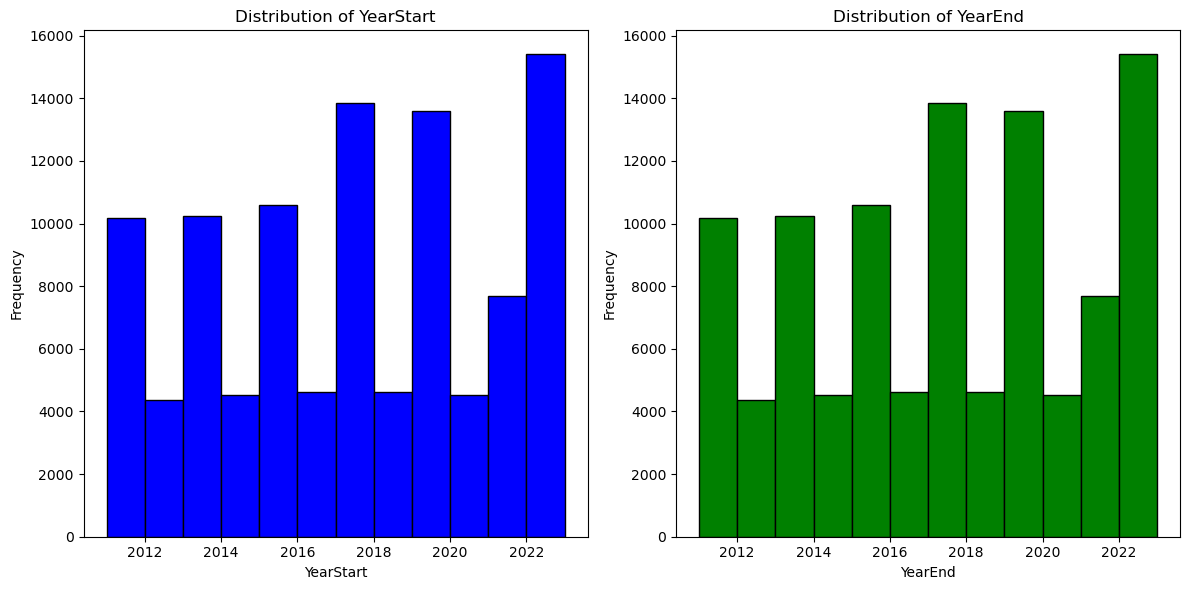

In [30]:
# Plotting the distribution of YearStart and YearEnd
plt.figure(figsize=(12, 6))

# YearStart
plt.subplot(1, 2, 1)
plt.hist(df['YearStart'], bins=range(df['YearStart'].min(), df['YearStart'].max() + 1), color='blue', edgecolor='black')
plt.title('Distribution of YearStart')
plt.xlabel('YearStart')
plt.ylabel('Frequency')

# YearEnd
plt.subplot(1, 2, 2)
plt.hist(df['YearEnd'], bins=range(df['YearEnd'].min(), df['YearEnd'].max() + 1), color='green', edgecolor='black')
plt.title('Distribution of YearEnd')
plt.xlabel('YearEnd')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Insights for YearStart and YearEnd:

1. Both YearStart and YearEnd have similar distributions, as expected.

2. The frequency of data entries is not uniform across the years.

3. Shows a gradual increase in data entries over time, peaking in 2022. This could be indicative of either more extensive data collection efforts or reporting lags that have caught up by the end of this timeline.

Distribution of Data_Value_Unit

In [31]:
# Checking unique values in Data_Value_Unit
df['Data_Value_Unit'].unique()

array([2011., 2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019.,
       2020., 2021.,   nan])

The Data_value_unit should be a categorical column , as contains the units of data value , but we have seen the it's contains year values , it is likely that there is an anomaly in this column so we will ignore this column as does not provide any useful information.

Distribution of Data_Value and Data_Value_Alt 

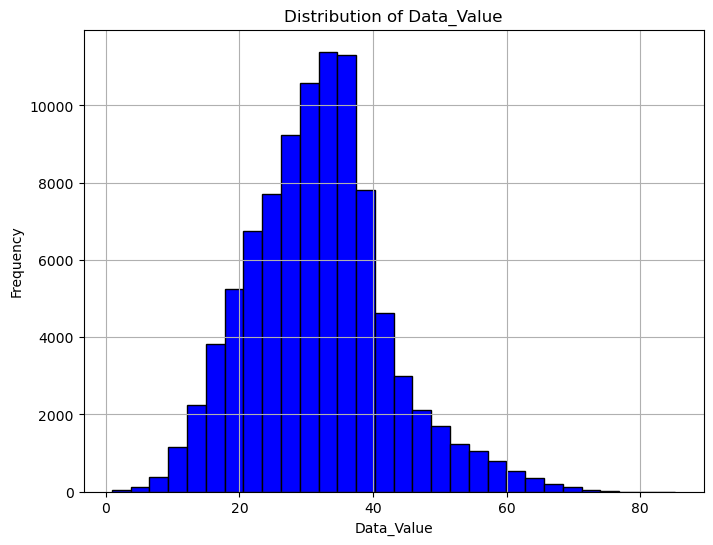

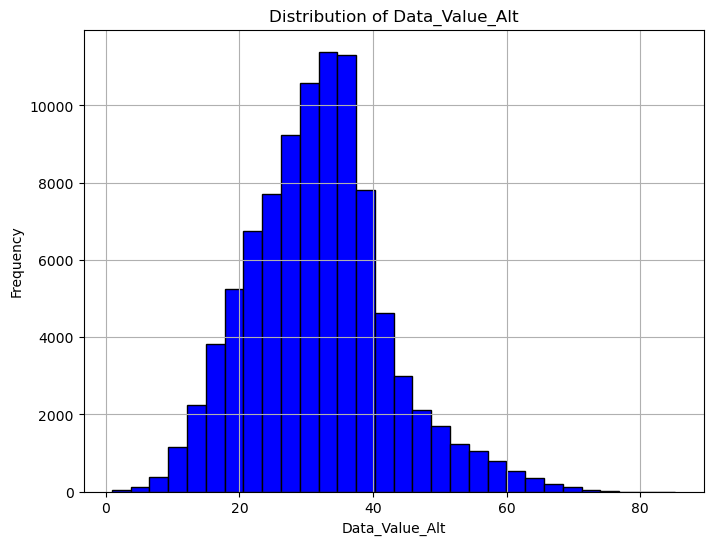

In [32]:
# Plotting the distribution of Data_Value
plt.figure(figsize=(8, 6))
plt.hist(df['Data_Value'].dropna(), bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Data_Value')
plt.xlabel('Data_Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting the distribution of Data_Value
plt.figure(figsize=(8, 6))
plt.hist(df['Data_Value_Alt'].dropna(), bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Data_Value_Alt')
plt.xlabel('Data_Value_Alt')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



Insights for Data_Value & Data_Value_Alt(mirroring of data_value):

1. The distribution of Data_Value and Data_Value_Alt appears to be slightly skewed to the right, with a majority of the values concentrated on the lower end.

2. There are a few higher values, indicating that some outliers might exist in the data.

3. Since Data_Value represents percentages or values associated with physical activity, obesity, and similar topics, this skewness could suggest that most locations have lower proportions for certain indicators.

Distribution of LocationID

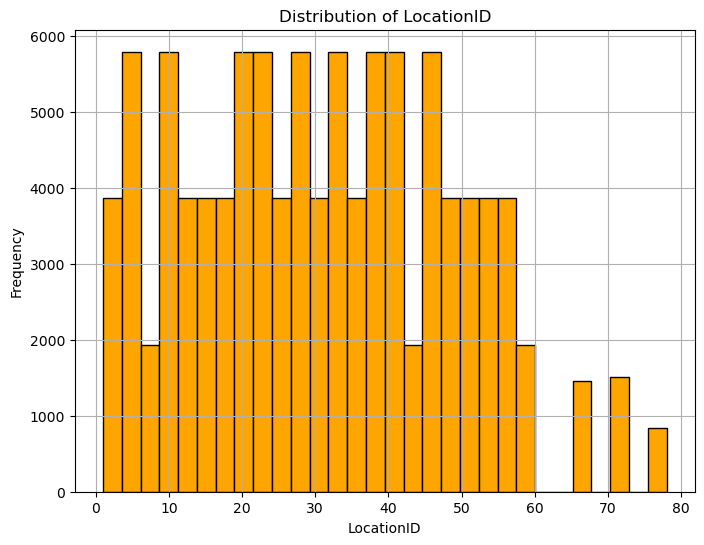

In [33]:
# Plotting the distribution of LocationID
plt.figure(figsize=(8, 6))
plt.hist(df['LocationID'], bins=30, color='orange', edgecolor='black')
plt.title('Distribution of LocationID')
plt.xlabel('LocationID')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Insights for LocationID:

1. The LocationID distribution shows that certain location IDs are more frequently represented than others.

2. This suggests that some regions or states might have contributed more data or have more granular reporting than others, leading to an uneven distribution of records across locations.

Distribution of Low_Confidence_Limit

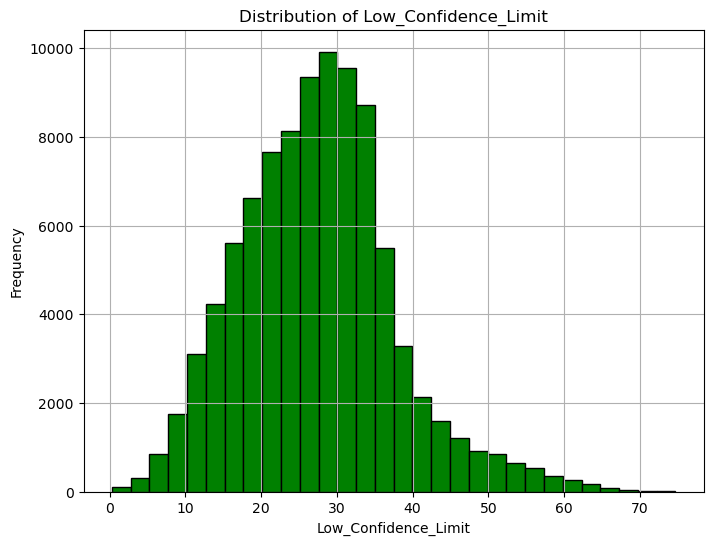

In [34]:
# Plotting the distribution of Low_Confidence_Limit
plt.figure(figsize=(8, 6))
plt.hist(df['Low_Confidence_Limit'].dropna(), bins=30, color='green', edgecolor='black')
plt.title('Distribution of Low_Confidence_Limit')
plt.xlabel('Low_Confidence_Limit')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Insights for Low_Confidence_Limit:

1. The distribution of Low_Confidence_Limit is also right-skewed, with the majority of values clustering at lower ranges.

2. Similar to Data_Value, this column shows that most observations have lower confidence limits, with fewer instances at higher values.

3. This indicates that the lower bounds for the confidence intervals are generally closer to the observed data values, with only a few locations having higher uncertainty.

Distribution of High_Confidence_Limit

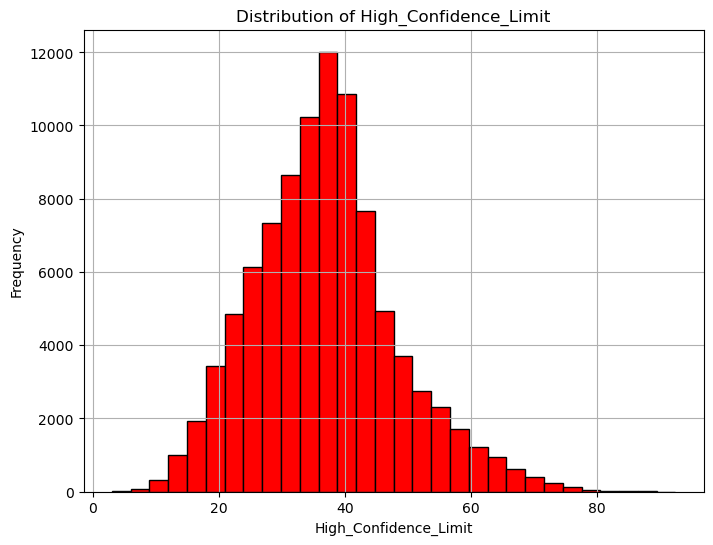

In [35]:
# Plotting the distribution of High_Confidence_Limit
plt.figure(figsize=(8, 6))
plt.hist(df['High_Confidence_Limit '].dropna(), bins=30, color='red', edgecolor='black')
plt.title('Distribution of High_Confidence_Limit')
plt.xlabel('High_Confidence_Limit')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Insights for High_Confidence_Limit:

1. Similar to the previous columns, High_Confidence_Limit is right-skewed, with most values concentrated at the lower end.

2. There are fewer observations at higher confidence limits, indicating that the upper bounds of the confidence intervals are generally closer to the observed values, but with some variation across the dataset.

Distribution of sample size

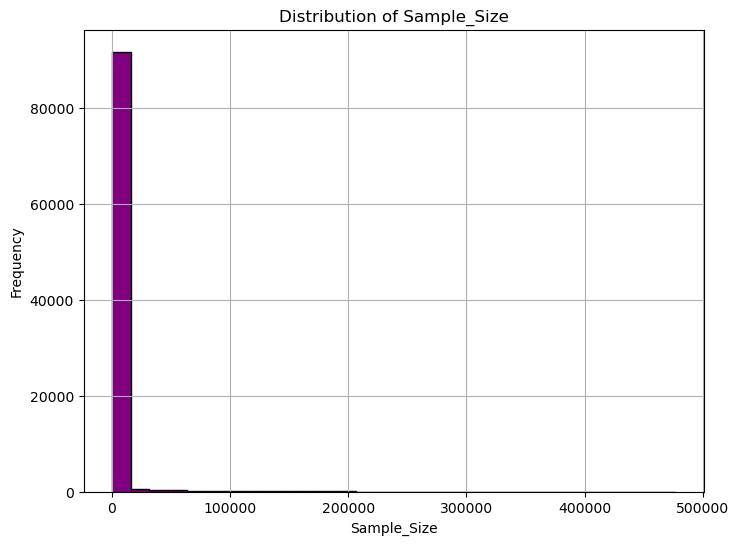

In [36]:
# Plotting the distribution of Sample_Size
plt.figure(figsize=(8, 6))
plt.hist(df['Sample_Size'].dropna(), bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Sample_Size')
plt.xlabel('Sample_Size')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Insights for Sample_Size:

1. The distribution of Sample_Size is heavily right-skewed, with a large number of observations having relatively small sample sizes and a few outliers with significantly larger sizes.

2. This suggests that most of the data points are based on smaller populations or samples, with only a few instances where the sample size is considerably higher.

#### Let's analyze the categorical data 

In [37]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['LocationAbbr', 'LocationDesc', 'Datasource', 'Class', 'Topic',
       'Question', 'Data_Value_Type', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Total', 'Age(years)', 'Education', 'Gender',
       'Income', 'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID',
       'QuestionID', 'DataValueTypeID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')


In [38]:
# Print the unique count and the most frequent category for each categorical column
for column in categorical_cols:
    if column in df.columns:
        unique_count = df[column].nunique()
        top_category = df[column].value_counts().idxmax()
        top_category_count = df[column].value_counts().max()
        missing_count = df[column].isnull().sum()
        print(f"{column} - Unique values: {unique_count}, Most frequent: {top_category} (Count: {top_category_count}), Missing: {missing_count}")
    else:
        print(f"{column} is not in the DataFrame.")


LocationAbbr - Unique values: 55, Most frequent: AK (Count: 1932), Missing: 0
LocationDesc - Unique values: 55, Most frequent: Alaska (Count: 1932), Missing: 0
Datasource - Unique values: 1, Most frequent: BRFSS (Count: 104272), Missing: 0
Class - Unique values: 3, Most frequent: Physical Activity (Count: 55720), Missing: 0
Topic - Unique values: 3, Most frequent: Physical Activity - Behavior (Count: 55720), Missing: 0
Question - Unique values: 9, Most frequent: Percent of adults aged 18 years and older who have obesity (Count: 19684), Missing: 0
Data_Value_Type - Unique values: 1, Most frequent: Value (Count: 104272), Missing: 0
Data_Value_Footnote_Symbol - Unique values: 1, Most frequent: ~ (Count: 10767), Missing: 93505
Data_Value_Footnote - Unique values: 1, Most frequent: Data not available because sample size is insufficient. (Count: 10767), Missing: 93505
Total - Unique values: 1, Most frequent: Total (Count: 3724), Missing: 100548
Age(years) - Unique values: 6, Most frequent: 3

columns with constant value

In [39]:
constant_columns = []
for column in df.columns:
    if df[column].nunique() == 1:
        constant_columns.append(column)

print("Columns with only one constant value:", constant_columns)


Columns with only one constant value: ['Datasource', 'Data_Value_Type', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'Total', 'DataValueTypeID']


Columns that contain only one constant value across all entries don't contribute to variability or differences in data, so it make them not useful for exploratory data analysis. But Identifying such columns is important because they typically offer no insight into patterns or relationships within the dataset and are often excluded from further analysis and modeling to streamline processing and improve model performance.

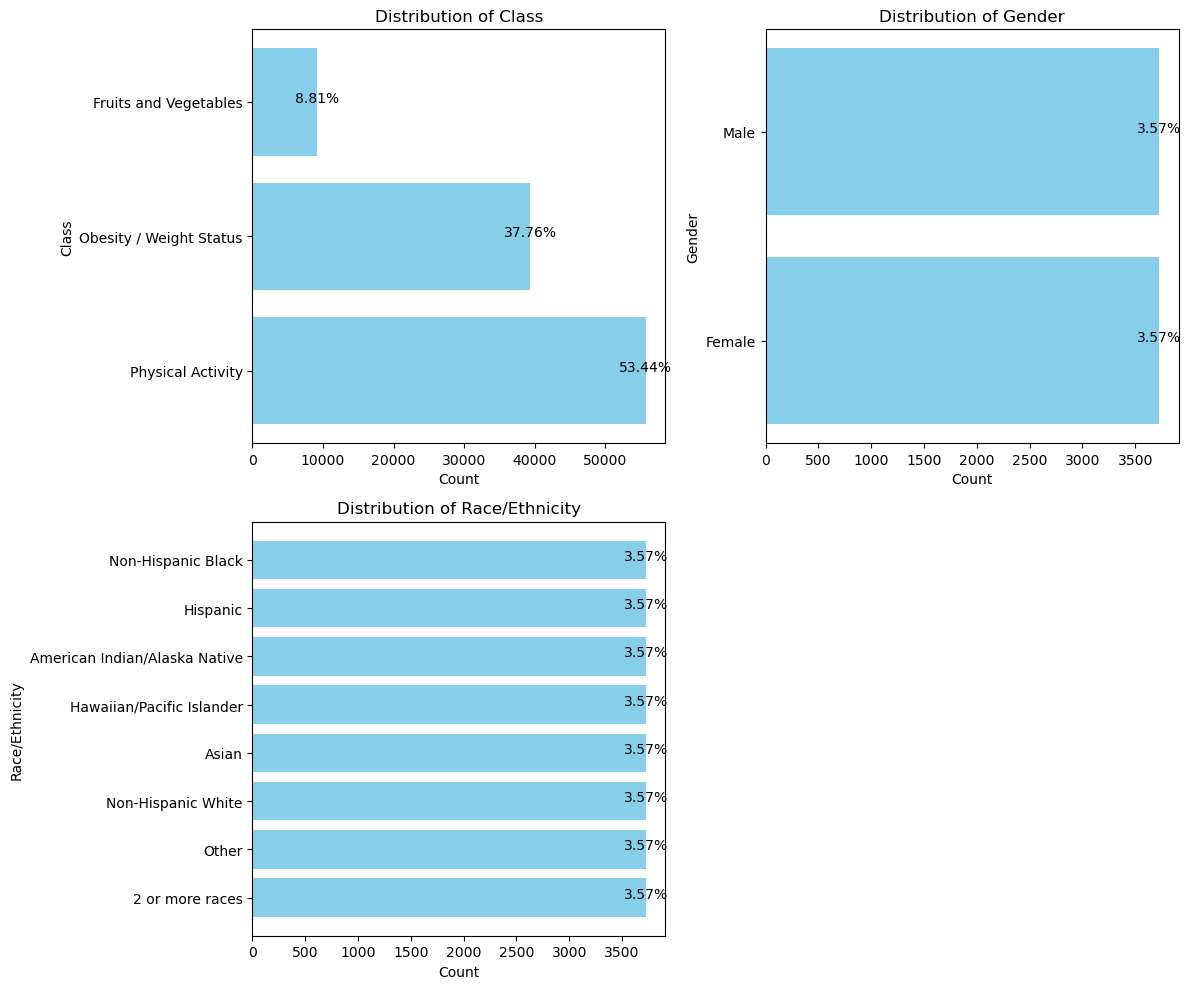

In [40]:
# Selecting representative columns to visualize
to_visualize = ['Class', 'Gender', 'Race/Ethnicity']

# Creating a figure for subplots
plt.figure(figsize=(12, 10))

for i, column in enumerate(to_visualize, 1):
    if column in df.columns:
        plt.subplot(2, 2, i)
        
        # Getting value counts for the column
        value_counts = df[column].value_counts()
        total = float(len(df))
        
        # Plotting using matplotlib
        bars = plt.barh(value_counts.index, value_counts.values, color="skyblue")
        plt.title(f'Distribution of {column}')
        plt.xlabel('Count')
        plt.ylabel(column)
        
        # Adding percentage labels
        for bar in bars:
            width = bar.get_width()
            plt.text(width + 3, bar.get_y() + bar.get_height()/2.,
                     '{:1.2f}%'.format((width/total)*100),
                     ha="center")

    plt.tight_layout()

plt.show()


--> Insights for Class
Physical Activity is the most represented category, constituting over 50% of the entries, indicating a major focus on activities related to physical health.

Obesity / Weight Status is also significant but less prevalent than Physical Activity, making up approximately 38% of the data. This suggests substantial attention but to a lesser extent compared to physical activities.

Fruits and Vegetables have the least representation at about 9%, indicating minimal focus within this dataset on diet compared to other health aspects.

--> Insights for Gender
The dataset appears to be equally distributed between Male and Female participants, with each gender comprising about 50% of the data. This equitable distribution is beneficial for analysis as it reduces gender bias in the findings.

--> Insights for Race/Ethnicity
The distribution across different races/ethnicities is even, with each group represented at approximately 3.57%. This suggests that the dataset has been normalized to prevent any racial or ethnic biases, ensuring equal representation and relevance across diverse groups.

These insights reveal a well-balanced dataset in terms of gender and race/ethnicity, with a more concentrated focus on physical activities relative to diet and obesity-related issues.

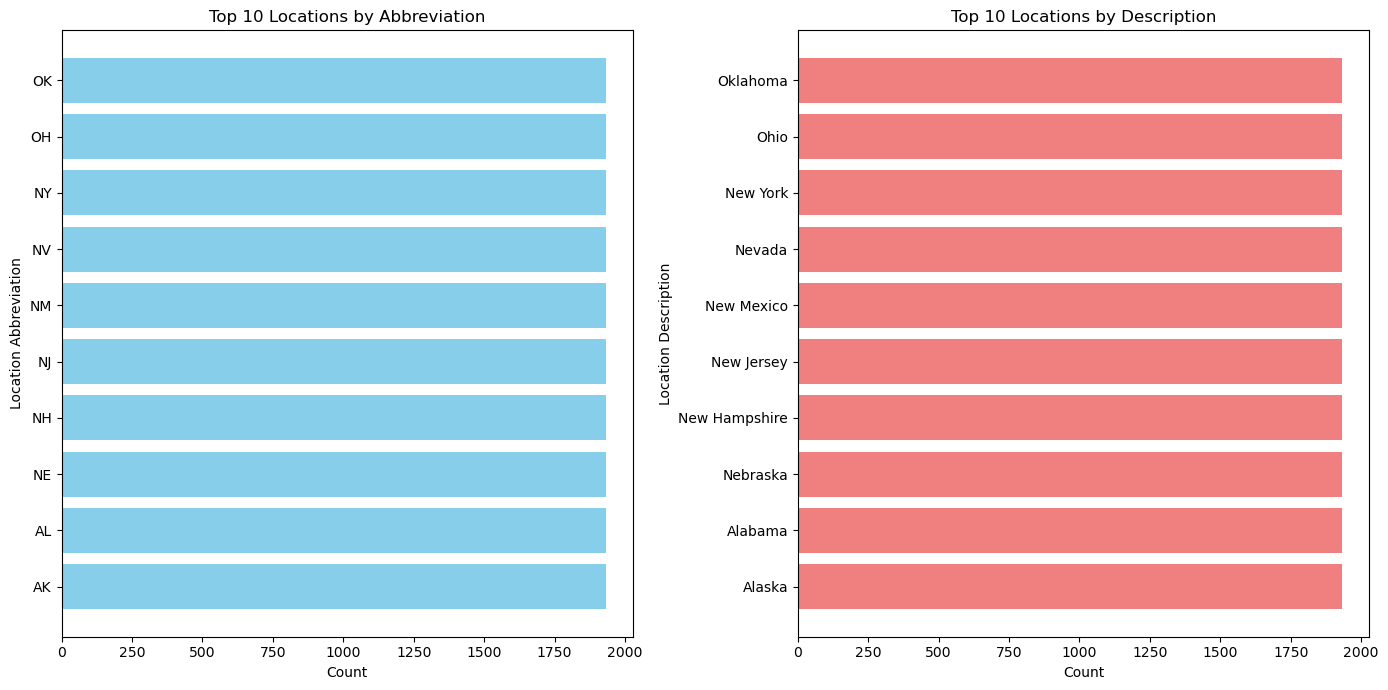

In [41]:
# Setting up figure size for subplots
plt.figure(figsize=(14, 7))

# Plot for LocationAbbr - Top 10 most frequent locations by abbreviation
plt.subplot(1, 2, 1)
abbr_counts = df['LocationAbbr'].value_counts().nlargest(10)
plt.barh(abbr_counts.index, abbr_counts.values, color="skyblue")
plt.title('Top 10 Locations by Abbreviation')
plt.xlabel('Count')
plt.ylabel('Location Abbreviation')

# Plot for LocationDesc - Top 10 most frequent locations by description
plt.subplot(1, 2, 2)
desc_counts = df['LocationDesc'].value_counts().nlargest(10)
plt.barh(desc_counts.index, desc_counts.values, color="lightcoral")
plt.title('Top 10 Locations by Description')
plt.xlabel('Count')
plt.ylabel('Location Description')

# Adjust layout for better spacing between plots
plt.tight_layout()
plt.show()

This could indicate a higher focus or more comprehensive data collection efforts in these areas, possibly due to specific health monitoring or research interests.

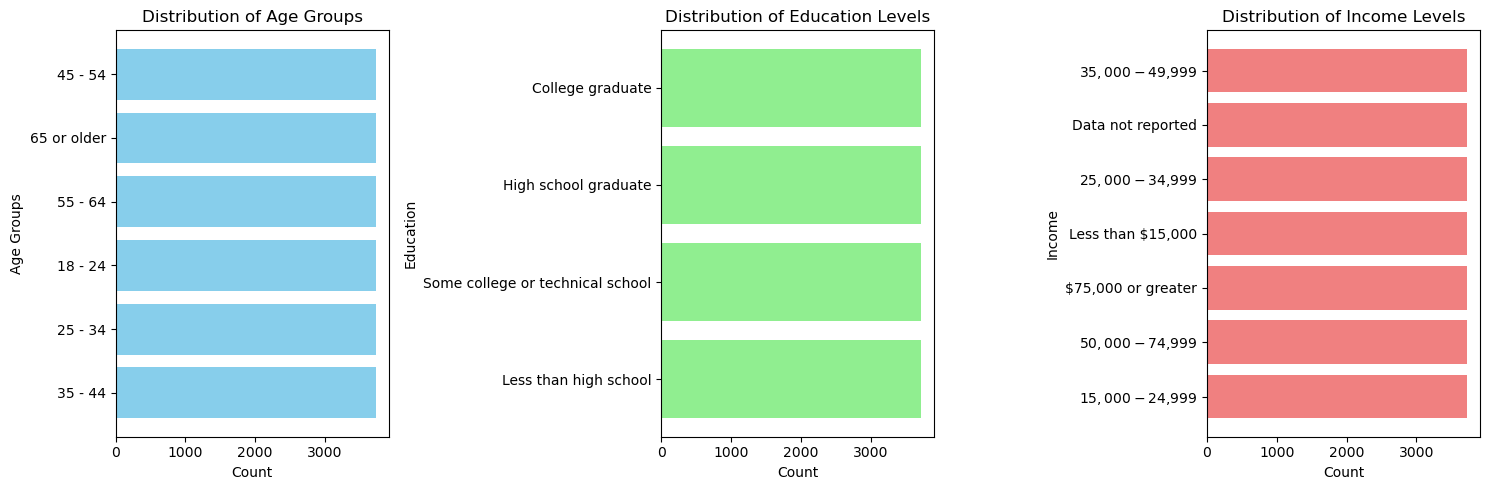

In [42]:
# Re-creating the count plots for 'Age(years)', 'Education', and 'Income' using matplotlib with `df_copy`

# Setting up figure size for subplots
plt.figure(figsize=(15, 5))

# Plot for Age(years) - Distribution of Age Groups
plt.subplot(1, 3, 1)
age_counts = df['Age(years)'].value_counts()
plt.barh(age_counts.index, age_counts.values, color="skyblue")
plt.title('Distribution of Age Groups')
plt.xlabel('Count')
plt.ylabel('Age Groups')

# Plot for Education - Distribution of Education Levels
plt.subplot(1, 3, 2)
education_counts = df['Education'].value_counts()
plt.barh(education_counts.index, education_counts.values, color="lightgreen")
plt.title('Distribution of Education Levels')
plt.xlabel('Count')
plt.ylabel('Education')

# Plot for Income - Distribution of Income Levels
plt.subplot(1, 3, 3)
income_counts = df['Income'].value_counts()
plt.barh(income_counts.index, income_counts.values, color="lightcoral")
plt.title('Distribution of Income Levels')
plt.xlabel('Count')
plt.ylabel('Income')

# Adjust layout to prevent overlap between subplots
plt.tight_layout()
plt.show()


These insights can be useful for understanding the demographics of the survey participants, especially in relation to how different age, education, and income groups might respond to the survey's topics. This information is crucial for making informed decisions when analyzing further data and drawing conclusions about population behaviors or characteristics based on the survey results.

##### Let's analyze our target variable with data value column.

With Numerical features

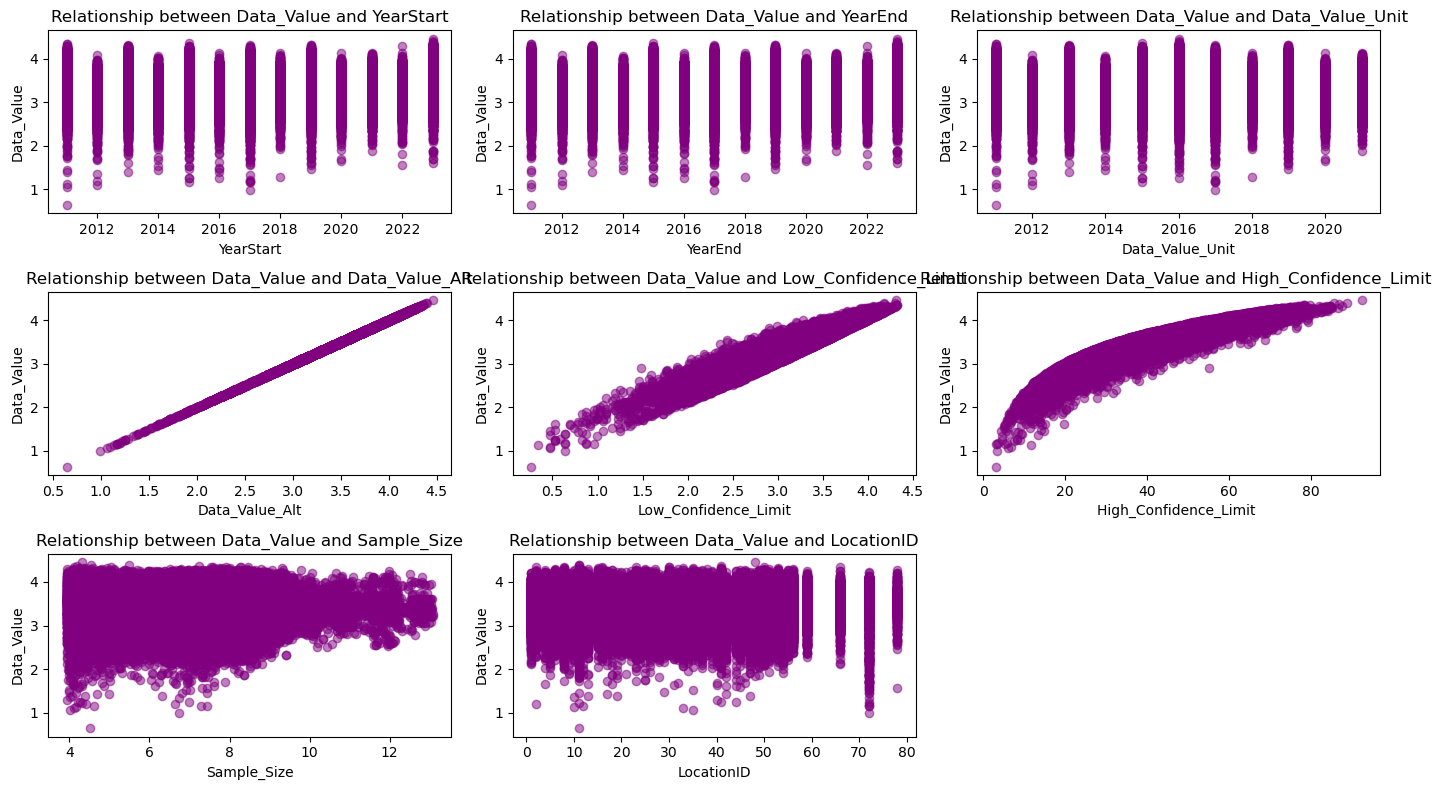

In [43]:
# Relationship between `Data_Value` and Numerical Features
numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_columns = numeric_columns.drop('Data_Value')  # Excluding target

plt.figure(figsize=(14, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    plt.scatter(df_copy[col], df_copy['Data_Value'], alpha=0.5, color='purple')
    plt.title(f'Relationship between Data_Value and {col}')
    plt.xlabel(col)
    plt.ylabel('Data_Value')
    plt.tight_layout()

plt.show()

Insights: 

1. Relationship between Data_Value and YearStart
Insight: The plot reveals that Data_Value remains relatively consistent across different years, without significant trends or variations over time. This suggests that the reported health metrics or behaviors tracked by Data_Value do not change drastically year-to-year.

    Conclusion: Since there are no strong trends, YearStart may not be a critical predictor for the target variable in a linear regression model.

2. Relationship between Data_Value and YearEnd
Insight: Similar to YearStart, YearEnd shows little influence on Data_Value. The values are stable across different years.

    Conclusion: Given the consistent values, YearEnd might also be redundant as a predictor in the model, unless temporal analysis is specifically needed.

3. Relationship between Data_Value and Data_Value_Unit
Insight: The scatter plot indicates a relatively even spread of Data_Value with respect to Data_Value_Unit. This feature may not exhibit any clear relationship with Data_Value.

    Conclusion: Data_Value_Unit may not contribute significantly to predicting Data_Value and could potentially be dropped if feature reduction is desired.

4. Relationship between Data_Value and Data_Value_Alt
Insight: A strong linear relationship is evident between Data_Value and Data_Value_Alt, as they form a near-perfect line. This suggests that Data_Value_Alt is a scaled or alternative representation of Data_Value.

    Conclusion: Due to high correlation, Data_Value_Alt might be redundant and could be removed to avoid multicollinearity in the regression model.

5. Relationship between Data_Value and Low_Confidence_Limit
Insight: There is a positive linear relationship between Data_Value and Low_Confidence_Limit. Higher values in Low_Confidence_Limit correspond to higher Data_Value, indicating that Low_Confidence_Limit can serve as a predictor for Data_Value.

    Conclusion: Low_Confidence_Limit could be a useful feature in the regression model, as it provides information on the lower bound of confidence, which correlates well with the target.

6. Relationship between Data_Value and High_Confidence_Limit
Insight: Similar to Low_Confidence_Limit, High_Confidence_Limit also shows a strong positive relationship with Data_Value. This relationship suggests that as High_Confidence_Limit increases, so does Data_Value.

    Conclusion: Including High_Confidence_Limit in the model could improve predictions, as it aligns closely with Data_Value. However, since both confidence limits are highly correlated, one may be dropped if needed to avoid multicollinearity.

7. Relationship between Data_Value and Sample_Size
Insight: There is a wider spread in Data_Value as Sample_Size increases, but no clear linear relationship is observed. While larger sample sizes might influence precision, they don’t strongly correlate with Data_Value.

    Conclusion: Sample_Size may not be a critical predictor for Data_Value and could be considered for removal if feature reduction is necessary.

8. Relationship between Data_Value and LocationID
Insight: The values of Data_Value appear scattered across different LocationID values, indicating no clear trend. This suggests that LocationID, representing geographic regions, may not strongly influence Data_Value.

    Conclusion: While LocationID doesn’t exhibit a direct linear relationship with Data_Value, it might still capture regional variance. It can be retained if there is a need for region-specific insights, otherwise, it could be dropped.

With Categorical Column

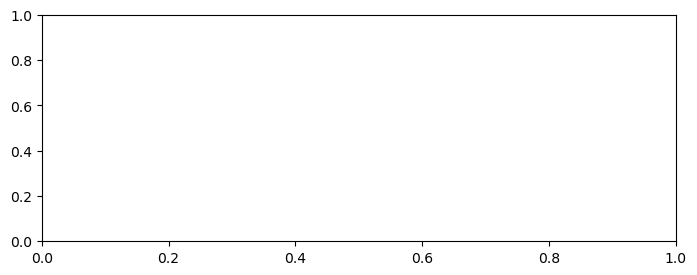

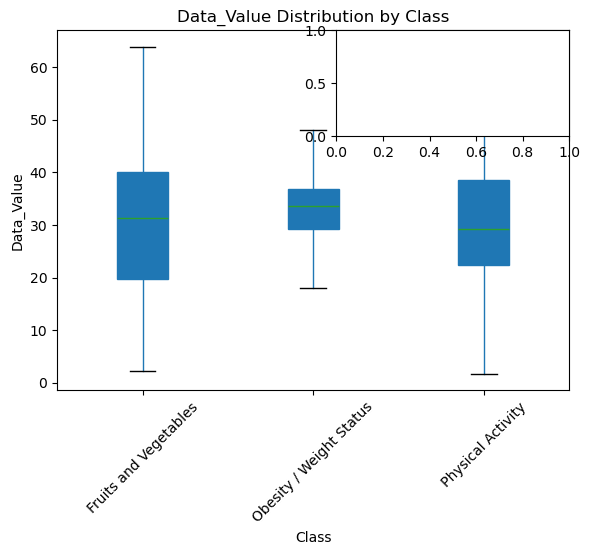

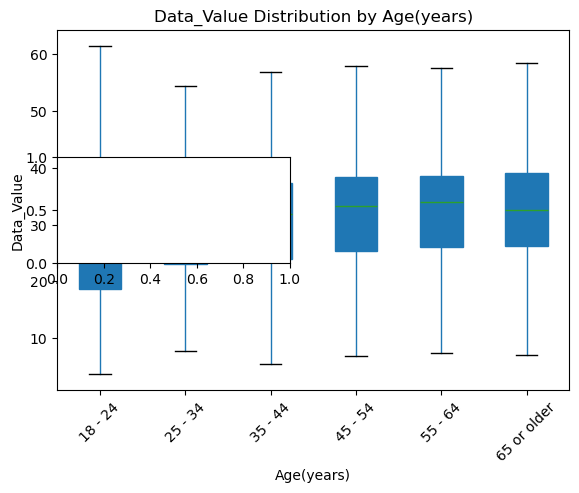

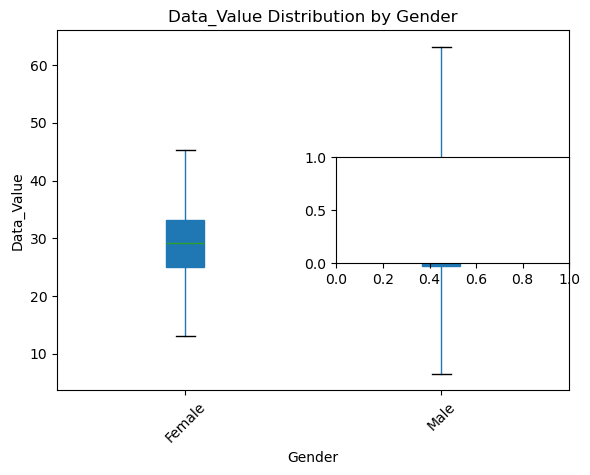

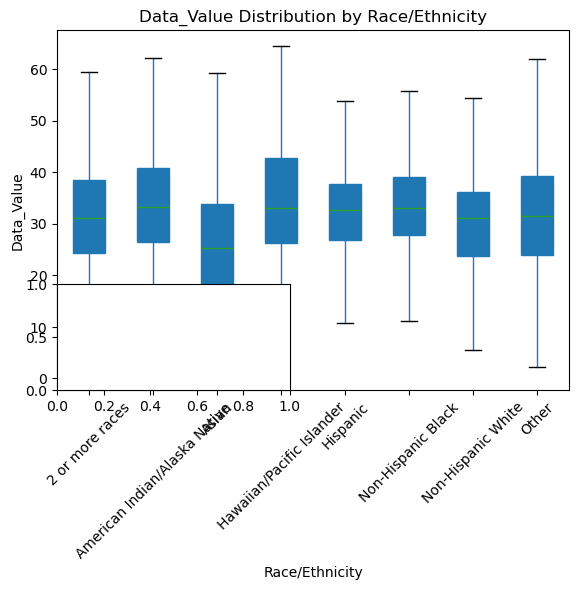

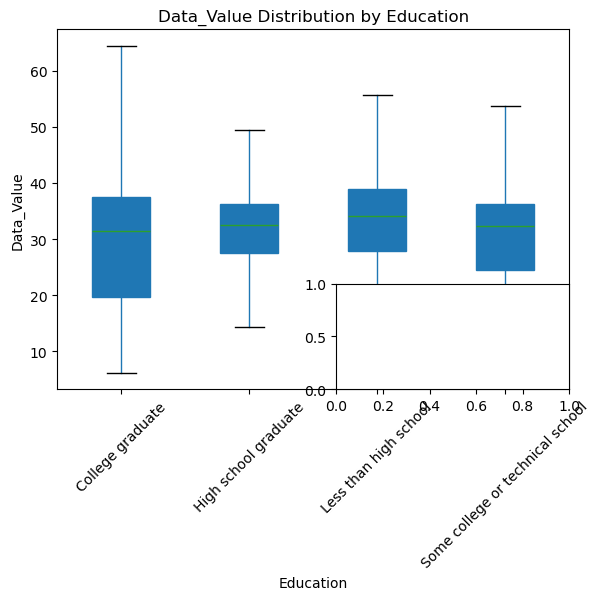

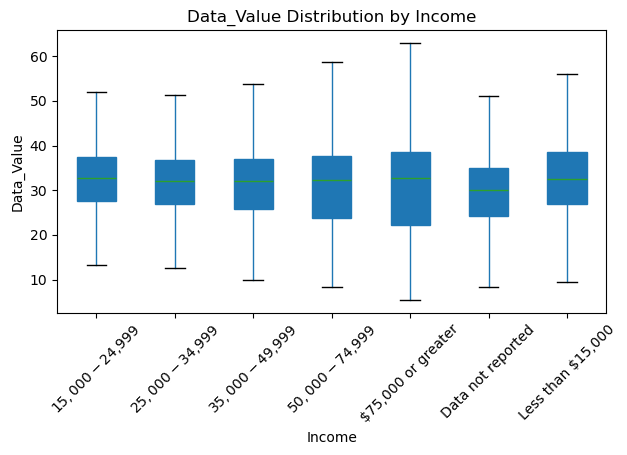

In [44]:
# Assessing Categorical Features Using Box Plots
categorical_features = ['Class', 'Age(years)', 'Gender', 'Race/Ethnicity', 'Education', 'Income']
plt.figure(figsize=(18, 10))
for i, col in enumerate(categorical_features, 1):
    if col in df.columns:
        plt.subplot(3, 2, i)
        df.boxplot(column='Data_Value', by=col, patch_artist=True, grid=False, showfliers=False)
        plt.title(f'Data_Value Distribution by {col}')
        plt.suptitle('')
        plt.xlabel(col)
        plt.ylabel('Data_Value')
        plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insights:

1. Data_Value Distribution by Class
Observation: The Data_Value varies significantly across different classes (e.g., "Fruits and Vegetables," "Obesity/Weight Status," "Physical Activity").

    Insight: The median Data_Value for "Obesity/Weight Status" is lower and more consistent compared to other classes, indicating fewer extreme values. On the other hand, "Fruits and Vegetables" and "Physical Activity" exhibit a wider range, with some outliers and greater variability.

    Conclusion: This suggests that behaviors related to diet (e.g., fruit and vegetable intake) and physical activity levels may have more diverse values, possibly reflecting variations in lifestyle across populations.

2. Data_Value Distribution by Age (years)
Observation: Across age groups, Data_Value tends to have a relatively similar range. However, younger age groups (18–24) have a slightly wider distribution, while older groups show more stability.

    Insight: Younger individuals may exhibit more variability in health-related behaviors or measurements. The consistency in older age groups could reflect more established lifestyles or habits.

    Conclusion: Age may contribute to predicting Data_Value, but the differences between age groups are not drastic, suggesting it might be a minor influence compared to other factors.

3. Data_Value Distribution by Gender
Observation: The distribution of Data_Value shows that males tend to have a wider range of values, including outliers, while females have a narrower range.

    Insight: This could suggest that males have more variability in the reported behaviors or health measurements, possibly due to a wider range of lifestyles or health risks. In contrast, females tend to have more consistent values.

    Conclusion: Gender differences are evident and may play a role in predicting Data_Value, but the variability in males warrants a closer look to understand the contributing factors.

4. Data_Value Distribution by Race/Ethnicity
Observation: Different racial/ethnic groups show variations in Data_Value distribution. For instance, "Hawaiian/Pacific Islander" and "Non-Hispanic Black" have a wider range compared to groups like "Non-Hispanic White."

    Insight: Racial and ethnic backgrounds may influence health-related behaviors or access to resources that affect Data_Value. Groups with broader distributions may experience greater disparities in lifestyle or healthcare access.

    Conclusion: Race/Ethnicity is likely an important predictor of Data_Value, highlighting the need for culturally sensitive health interventions.

5. Data_Value Distribution by Education
Observation: Higher education levels, such as "College graduate," show a wider distribution in Data_Value compared to lower education levels.

    Insight: Individuals with higher education may have more diverse behaviors or resources that affect health-related data, while lower education levels exhibit more consistency in Data_Value.

    Conclusion: Education appears to have an impact on health-related behaviors, with college graduates showing greater variability, possibly due to lifestyle diversity. This suggests that education could be a significant predictor in a health-related model.

6. Data_Value Distribution by Income
Observation: Income levels also influence Data_Value, with higher income groups showing wider distributions. However, the range is relatively consistent across most income brackets.

    Insight: Higher income brackets, such as "$75,000 or greater," exhibit slightly more variability in Data_Value, which could be attributed to different lifestyle choices or access to health resources.

    Conclusion: Income impacts Data_Value moderately. High-income groups may have more diverse health behaviors, reflecting the influence of socioeconomic status on health.


#### Variance Inflation Factor (VIF)

In [45]:
# Checking Multicollinearity Using Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating VIF for the numerical features
X = df[numeric_columns].dropna()  # Dropping rows with missing data for VIF calculation
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Displaying the VIF data
vif_data_sorted = vif_data.sort_values(by='VIF', ascending=False)
print("Variance Inflation Factor (VIF) for Numerical Features:")
print(vif_data_sorted)

Variance Inflation Factor (VIF) for Numerical Features:
                  Feature          VIF
0               YearStart          inf
1                 YearEnd          inf
2         Data_Value_Unit          inf
3          Data_Value_Alt  9049.412129
5  High_Confidence_Limit   2429.883858
4    Low_Confidence_Limit  2305.569812
7              LocationID     4.269691
6             Sample_Size     1.106431


Analysis of Each Feature’s VIF:

1. YearStart and YearEnd (VIF = inf): These two features have infinite VIF, suggesting perfect multicollinearity. Since they represent the start and end years of data collection, they are likely either identical or linearly dependent, making them redundant in the model.

2. Data_Value_Unit (VIF = inf): This feature also has infinite VIF, indicating it has perfect collinearity with one or more other features. This might imply it is highly correlated or potentially identical in values with another feature. It should be investigated further, but it may be redundant.

3. Data_Value_Alt (VIF = 9043.67): This extremely high VIF value indicates very high multicollinearity. Given that Data_Value_Alt is almost identical to Data_Value, it’s likely just an alternative representation of the same value. Including both Data_Value and Data_Value_Alt in the model would introduce redundancy, so Data_Value_Alt can likely be removed.

4. High_Confidence_Limit (VIF = 2429.24) and Low_Confidence_Limit (VIF = 2305.57): These two features have very high VIF values, suggesting strong multicollinearity, likely because they both represent bounds around Data_Value. Including both confidence limits could introduce redundancy since they are likely highly correlated with Data_Value and each other.

5. LocationID (VIF = 4.27): This VIF is moderate and does not indicate severe multicollinearity. LocationID appears to be relatively independent and can be retained in the model.

6. Sample_Size (VIF = 1.11): This low VIF value indicates little to no multicollinearity, so it can be safely included in the model without concerns about redundancy.

Summary:

we can remove Features with Infinite VIF: YearStart, YearEnd, and Data_Value_Unit should be considered for removal due to perfect multicollinearity.

we can consider Dropping Highly Redundant Features: Data_Value_Alt, High_Confidence_Limit, and Low_Confidence_Limit exhibit strong multicollinearity and may introduce redundancy. If one of the confidence limits is included, the other may be omitted to reduce collinearity.

we can retain LocationID and Sample_Size: These features show low to moderate VIF, indicating they don’t suffer from severe multicollinearity and can provide unique information to the model.

#### Correlation

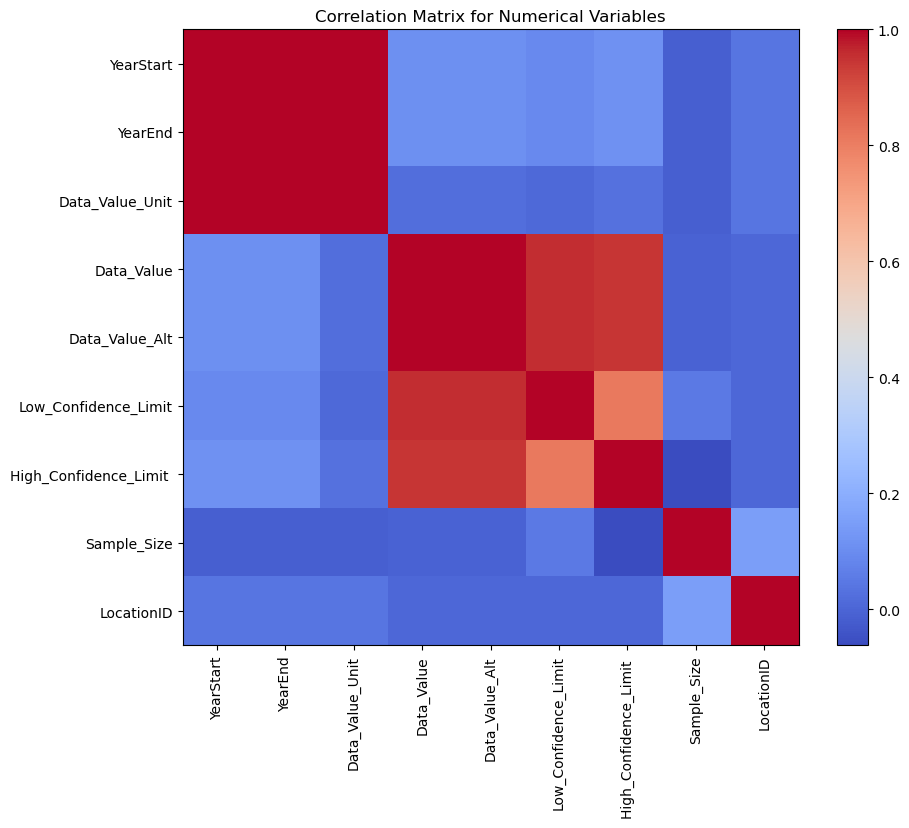

In [46]:
# Heatmap of Correlation Matrix for Numerical Variables
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix for Numerical Variables')
plt.xticks(ticks=np.arange(len(numeric_columns)), labels=numeric_columns, rotation=90)
plt.yticks(ticks=np.arange(len(numeric_columns)), labels=numeric_columns)
plt.show()

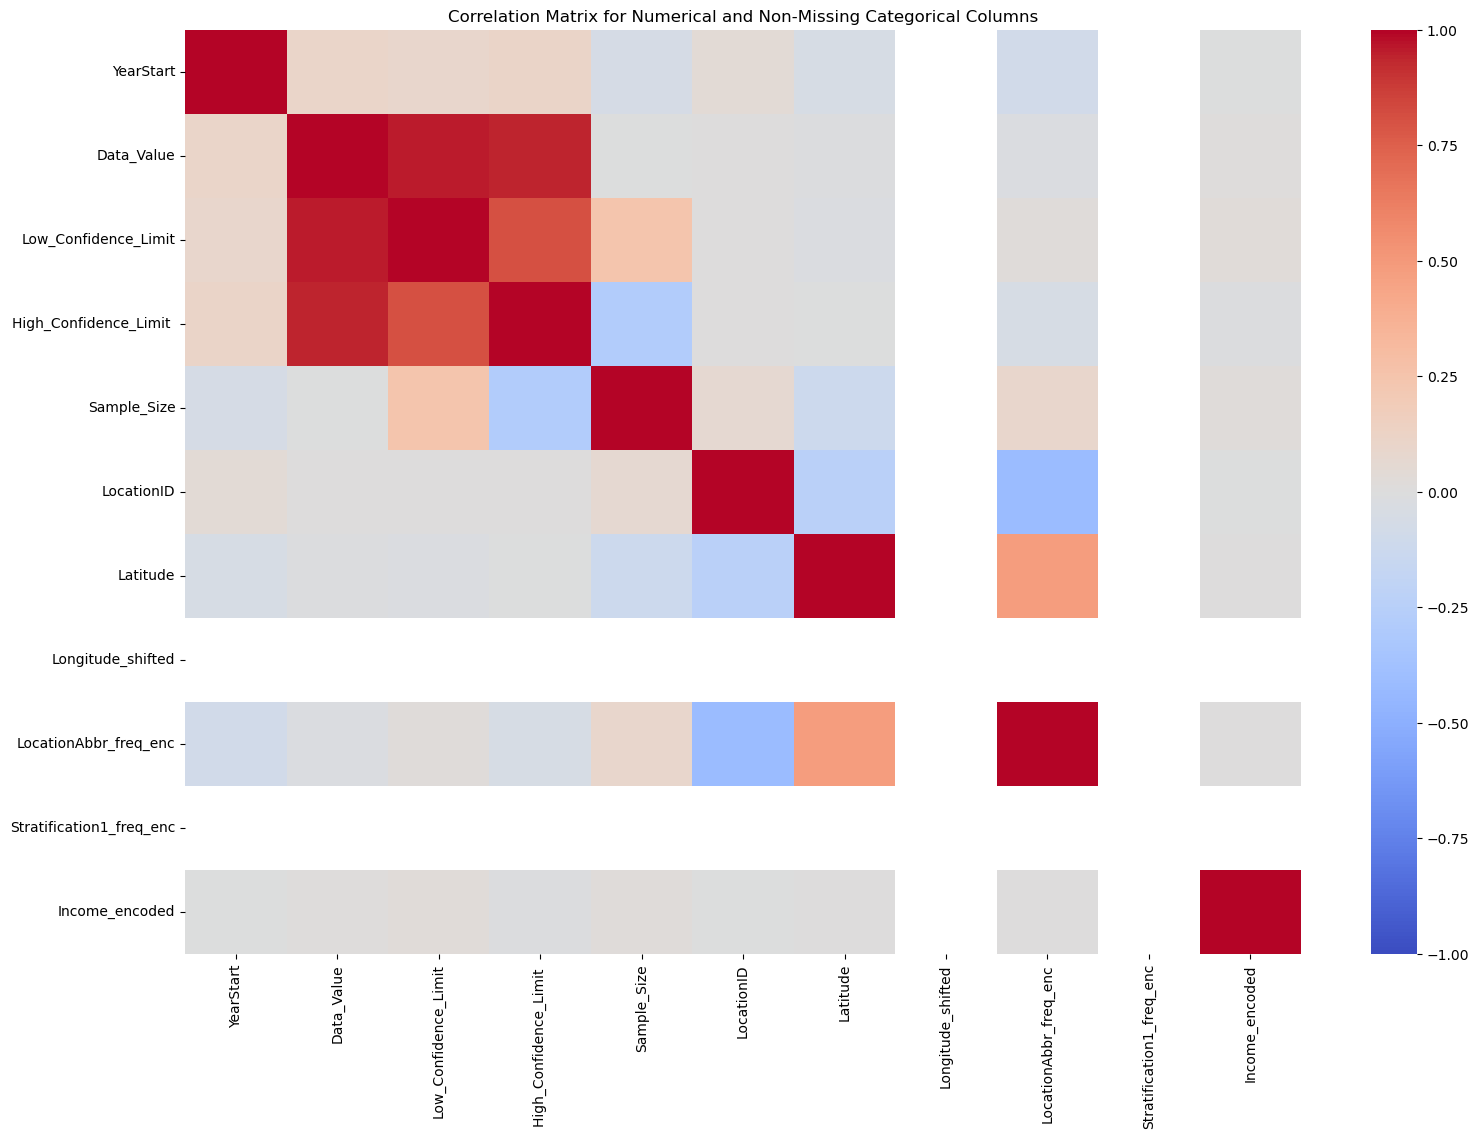

In [214]:
import seaborn as sns
# First, separate numerical and categorical columns
numerical_columns = df_copy.select_dtypes(include=['float64', 'int64'])

# Find categorical columns that do not have missing values
categorical_columns = df_copy.select_dtypes(include=['object']).dropna(axis=1)

# Combine numerical and non-missing categorical columns
combined_data = pd.concat([numerical_columns, categorical_columns], axis=1)

# Encode categorical columns to numerical values for correlation analysis
encoded_data = pd.get_dummies(combined_data, drop_first=True)

# Calculate the correlation matrix for the new dataset
combined_correlation_matrix = encoded_data.corr()

# Plot the heatmap for the combined correlation matrix
plt.figure(figsize=(18, 12))
sns.heatmap(combined_correlation_matrix, annot=False, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Matrix for Numerical and Non-Missing Categorical Columns')
plt.show()


Insights :

1. Datasource nas constant value BRFSS"

2. Data_Value_Type has constant value "Value"

3. Data_value_Footnote_Symbol has constant value "~"

4. Data_Value_Footnote has constant value "Data not available because sample size is insufficient."

5. Total has constant value "Total"

6. DataValueTypeID has constant value "VALUE'

7. Age (years) is highly overall correlated with Stratification1, StratificationCategory1.
ȘtratificationCategoryld1._ Stratification|D1

8. Class is highly overall correlated with ClassID and Question

9. ClassID is highly overall correlated with QuestionlD,TopiclD 

10. Data_Value is highly overall correlated with Data_Value_Alt ,High_Confidence_Limit , Low_Confidence..Limit

11. Data_Value_Alt is highly overall correlated with Data_Value , High_ onfidense_ Low_Confidence_Limit

12. Data_Value_Unit is highly overall correlated with YearEnd , YeaStart( which is anomaly , by mistake it has year value.)

13. Education is highly overall correlated with Stratification1 .StratificationGategory1

14. Gender is highly overall correlated with Stratification1 , $tratificationGategoryld1.

15. High_Confidence_Limit is highly overall correlated with Data_Value,_Data_Value_Alt, Low_ Confidence _Limit

16. Income is highly overall correlated with $tratification1. StratificationCategory1, StratificationCategoryld1

17. Low_Confidence_Limit is highly overall correlated with Data_value. Data_value_Alt, High_ConfidenceL_limit.

18. Question is highly overall correlated ClassID, QuestionlD, Topic, TopicID.

19. QuestionID is highly overall correlated ClassID, QuestionlD,  Topic, TopicID.

20. Race/Ethnicity is highly overall correlated with $tratification1, Stratification@ategory.

21. Stratification1 is highly overall correlated with Age(years), Education, Gender,_Income, Race/Ethnicity,
StratificationGategory , StratificationGategoryld1, StratificationID1

22. StratificationCategory1 is highly overall correlated  Age(years). Education. Gender, Income, Race/Ethnicity,Stratification, StratificationGategoryld1, StratificationlD1

23. StratificationCategoryId1 is highly overall correlated Age(years). Education. Gender, Income, Race/Ethnicity,Stratification, StratificationGategoryld1, StratificationlD1

24. StratificationI01 is highly overall correlated Age , Education. Gender, Income, Race/Ethnicity,Stratification, StratificationGategoryld1, StratificationlD1

25. Topic is highly overall correlated with ClasslD,, Question, ,QuestionlD, IopicID

26. TopicID is highly overall correlated with Class, ClasslD , Question , QuestionlD , Topic

27. YearEnd is highly overall correlated with Data_Value_Unit , YearStart

28. YearStart is highly overall correlated with Data_Value_Unit ,  YearEnd

29. Age(years) is uniformly distributed

30. Education is uniformly distributed

31. Gender is uniformly distributed

33. Income is uniformly distributed

34. Race/Ethnicity is uniformly distributed

35. Stratification1 is uniformly distributed

36. StratificationID1 is uniformly distributed

#### trend visualization

In [1]:
import pandas as pd
cleaned_data = pd.read_csv("cleaned_data.csv")

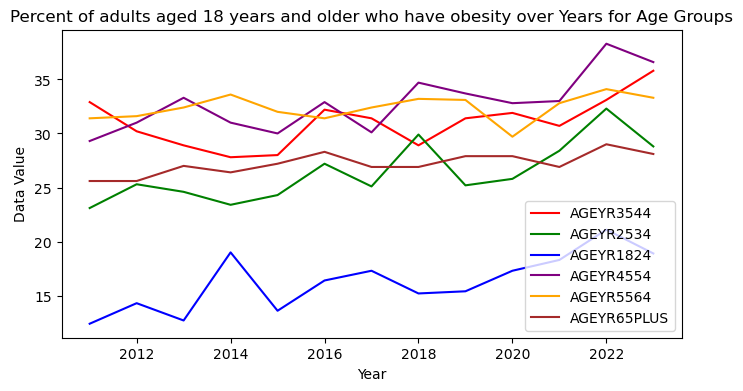

In [3]:
# Visualization for Percent of adults aged 18 years and older who have obesity over Years for Age Groups in Washington state

import matplotlib.pyplot as plt

# filtering (Location = 'WA' and QuestionID = 'Q036' and StratificationCategoryId1 = 'AGEYR')
filtered_data = cleaned_data[(cleaned_data['LocationAbbr'] == 'WA') & (cleaned_data['QuestionID'] == 'Q036') & (cleaned_data['StratificationCategoryId1'] == 'AGEYR')]

# set color by age groups
age_groups = {
    'AGEYR3544': 'red',
    'AGEYR2534': 'green',
    'AGEYR1824': 'blue',
    'AGEYR4554': 'purple',
    'AGEYR5564': 'orange',
    'AGEYR65PLUS': 'brown'
}

fig, ax = plt.subplots(figsize=(8, 4))

# data plots by age groups
for age_group, color in age_groups.items():
    group_data = filtered_data[filtered_data['StratificationID1'] == age_group]
    ax.plot(group_data['YearStart'], group_data['Data_Value'], label=age_group, color=color)

ax.set_title('Percent of adults aged 18 years and older who have obesity over Years for Age Groups')
ax.set_xlabel('Year')
ax.set_ylabel('Data Value')

ax.legend()

plt.show()

Insights : 
- We observe a slight increasing trend over the years.
- The percentage of obesity among youth remains relatively low each year.r

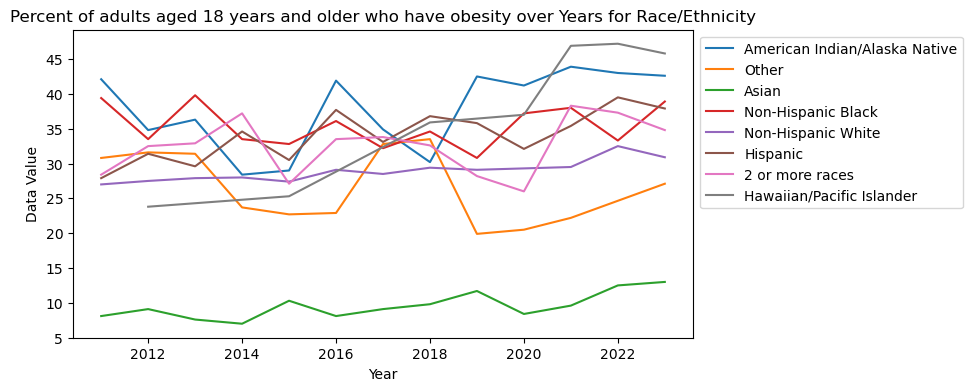

In [34]:
# Visualization for same question but across the Race/Ethinicity

# filtering (Location = 'WA' and QuestionID = 'Q036' and StratificationCategoryId1 = 'RACE' )
filtered_data = cleaned_data[(cleaned_data['LocationAbbr'] == 'WA') & (cleaned_data['QuestionID'] == 'Q036') & (cleaned_data['StratificationCategoryId1'] == 'RACE')]


fig, ax = plt.subplots(figsize=(8, 4))

# data plots by race/ethnicity
for edu_group in filtered_data['Stratification1'].unique():
    group_data = filtered_data[filtered_data['Stratification1'] == edu_group]
    ax.plot(group_data['YearStart'], group_data['Data_Value'], label=edu_group)

ax.set_title('Percent of adults aged 18 years and older who have obesity over Years for Race/Ethnicity')
ax.set_xlabel('Year')
ax.set_ylabel('Data Value')

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

Insights : 
- The percentage of obesity is noticeably lower among Asian populations.
- The chart also indicates an overall increasing trend across different race/ethinicity groups.

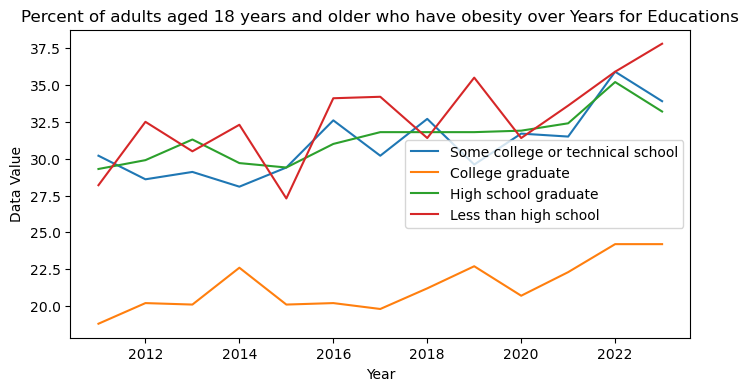

In [11]:
# Visualization for the same question but across the Education Level

# filtering (Location = 'WA' and QuestionID = 'Q036' and StratificationCategoryId1 = 'EDU' )
filtered_data = cleaned_data[(cleaned_data['LocationAbbr'] == 'WA') & (cleaned_data['QuestionID'] == 'Q036') & (cleaned_data['StratificationCategoryId1'] == 'EDU')]

fig, ax = plt.subplots(figsize=(8, 4))

# data plots by education levels
for edu_group in filtered_data['Stratification1'].unique():
    group_data = filtered_data[filtered_data['Stratification1'] == edu_group]
    ax.plot(group_data['YearStart'], group_data['Data_Value'], label=edu_group)

ax.set_title('Percent of adults aged 18 years and older who have obesity over Years for Educations')
ax.set_xlabel('Year')
ax.set_ylabel('Data Value')

ax.legend()

plt.show()

Insights : 
- There is a significant difference only among those with a college degree.
- The chart also indicates an overall increasing trend across different education levels.

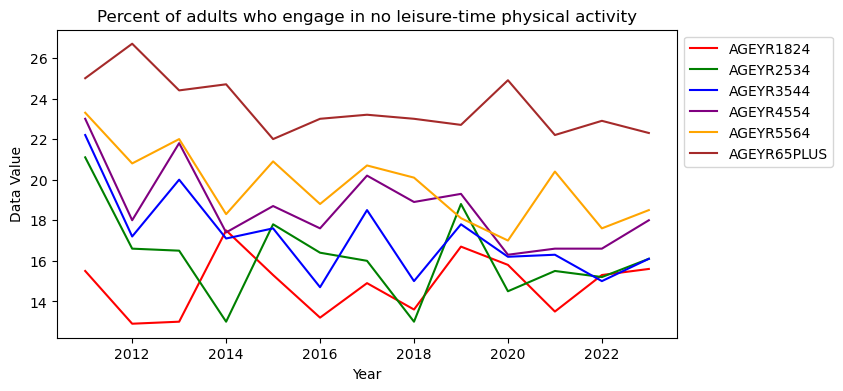

In [36]:
# Visualization the percent of adults who engage in no leisure-time physical activity across the age group in Washington stater.

# filtering (Location = 'WA' and QuestionID = 'Q047' and StratificationCategoryId1 = 'AGEYR')
filtered_data = cleaned_data[(cleaned_data['LocationAbbr'] == 'WA') & (cleaned_data['QuestionID'] == 'Q047') & (cleaned_data['StratificationCategoryId1'] == 'AGEYR')]

# set color by age groups
age_groups = {
    'AGEYR1824': 'red',
    'AGEYR2534': 'green',
    'AGEYR3544': 'blue',
    'AGEYR4554': 'purple',
    'AGEYR5564': 'orange',
    'AGEYR65PLUS': 'brown'
}

fig, ax = plt.subplots(figsize=(8, 4))

# data plots by age groups
for age_group, color in age_groups.items():
    group_data = filtered_data[filtered_data['StratificationID1'] == age_group]
    ax.plot(group_data['YearStart'], group_data['Data_Value'], label=age_group, color=color)

ax.set_title('Percent of adults who engage in no leisure-time physical activity')
ax.set_xlabel('Year')
ax.set_ylabel('Data Value')

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

Insights:
- Older individuals engage in significantly less physical activity compared to other age groups.
- There is an overall trend of decline over the years.
- It seems that people are becoming more attentive to their health, leading to an increase in physical activity over time.

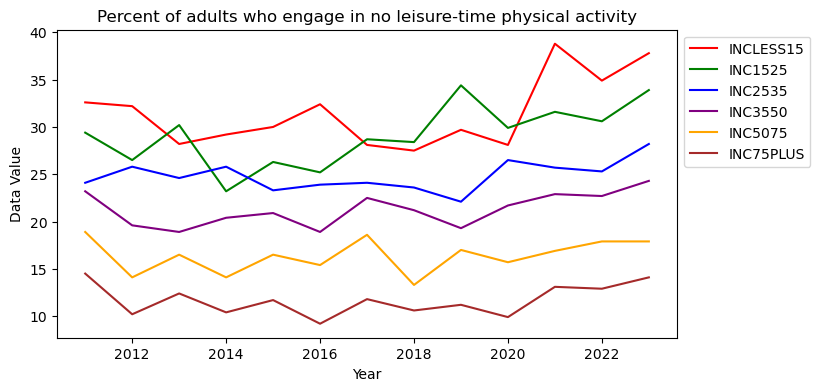

In [50]:
# Visualization the percent of adults who engage in no leisure-time physical activity across income level in Washington stater.

# filtering (Location = 'WA' and QuestionID = 'Q047' and StratificationCategoryId1 = 'INC' )
filtered_data = cleaned_data[(cleaned_data['LocationAbbr'] == 'WA') & (cleaned_data['QuestionID'] == 'Q047') & (cleaned_data['StratificationCategoryId1'] == 'INC')]

fig, ax = plt.subplots(figsize=(8, 4))

# set color by income
groups = {
    'INCLESS15': 'red',
    'INC1525': 'green',
    'INC2535': 'blue',
    'INC3550': 'purple',
    'INC5075': 'orange',
    'INC75PLUS': 'brown'
}

# data plots by income level
for group, color in groups.items():
    group_data = filtered_data[filtered_data['StratificationID1'] == group]
    ax.plot(group_data['YearStart'], group_data['Data_Value'], label=group, color=color)

ax.set_title('Percent of adults who engage in no leisure-time physical activity')
ax.set_xlabel('Year')
ax.set_ylabel('Data Value')

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

Insights : 
- The percentage of adults who engage in no leisure-time physical activity is higher among low-income individuals.
- It can be inferred that individuals with higher incomes have more resources to focus on their health, leading to an increase in their physical activity time.

Conclusion : We can identify trends in adult health behaviors, including physical activity and obesity status, across various indicators such as age, income, and education level. Overall, the percentage of obesity is increasing; conversely, efforts to engage in physical activity are also on the rise.

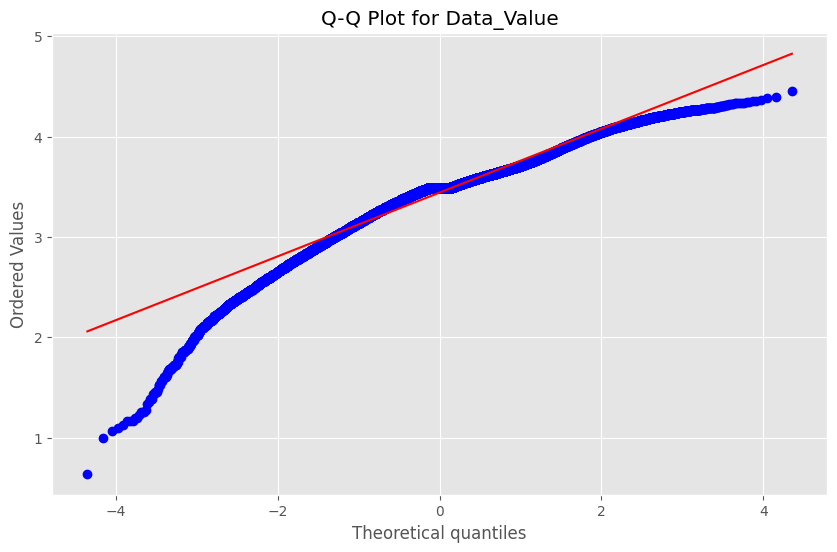

In [51]:
# Checking Normality of the Target Variable (Data_Value) Using a Q-Q Plot

from scipy import stats

plt.figure(figsize=(10, 6))
stats.probplot(df_copy['Data_Value'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot for Data_Value')
plt.show()

Insights:

1. Deviation from the Line:
The points deviate from the red line (which represents a perfect normal distribution) in both the lower and upper quantiles. This curvature suggests that Data_Value does not follow a perfectly normal distribution.
Skewness:

2. The initial curvature at the lower quantiles and the tapering off in the upper quantiles indicate slight skewness in the distribution of Data_Value. This skewness implies that some transformation (such as log or square root) might be needed if a normal distribution is required for modeling purposes.
Heavy Tails:

3. The points at both ends are further from the line, indicating that the distribution has heavier tails than a normal distribution, meaning there are more extreme values in the dataset than would be expected in a normal distribution.

Conclusion : The Data_Value variable is not normally distributed and exhibits some skewness and heavy tails , so for linear regression we could apply log transformation to improve the model perfromance.

# Model - Linear Regression


In [215]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [217]:
# Preparing the feature matrix and target variable
X = df_copy[selected_features]  # Features
y = df_copy['Data_Value']  # Target variable

In [218]:
# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


In [219]:
from sklearn.linear_model import LinearRegression

# model
model = LinearRegression()

# Fitting the model to the training data
model.fit(X_train, y_train)


LinearRegression()

In [220]:
# Making predictions on the test set
y_pred = model.predict(X_test)


In [221]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculating evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# results
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Absolute Error: 0.16617835718786644
Mean Squared Error: 0.10245918660063158
R² Score: 0.998955350509031


#### 1. Mean Absolute Error (MAE):
Value: 0.166

Interpretation: The MAE quantifies the average absolute difference between the predicted and actual values. Here, the model's predictions are, on average, off by about 0.166 units. This relatively low value indicates that the predictions are quite close to the actual outcomes.

#### 2. Mean Squared Error (MSE):
Value: 0.102

Interpretation: The MSE computes the average of the squared errors, placing greater emphasis on larger discrepancies. A lower MSE suggests better model performance, and with an MSE of 0.102, it indicates that the model has a minimal average error.

#### 3. R² Score (Coefficient of Determination):
Value: 0.999

Interpretation: The R² score reveals the proportion of variance in the target variable (Data_Value) that is explained by the model. An R² score of 0.999 signifies that 99.9% of the variance in the target variable is accounted for by the model's features, indicating an excellent fit.

Model shows outstanding performance based on these metrics. However, it’s important to further validate the model to ensure it generalizes effectively to new data. 

## Cross-Validation

In [224]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize the linear regression model
model = LinearRegression()

# Perform cross-validation (e.g., 5-fold cross-validation)
# Perform cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive MSE for interpretation
mse_scores = -cv_scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

print("Cross-validated Mean Squared Error:", mean_mse)
print("Standard Deviation of MSE:", std_mse)


Cross-validated Mean Squared Error: 0.1063953935688143
Standard Deviation of MSE: 0.009885448371769955


#### 1. Cross-Validated Mean Squared Error (MSE):

Value: 0.1064

Interpretation: This is the average MSE across the 5 folds of your cross-validation. It indicates that, on average, your model's predictions deviate from the actual values by approximately 0.1064 units squared. This value is quite low, suggesting that the model performs well.
#### 2. Standard Deviation of MSE:

Value: 0.0099

Interpretation: This measures the variability in MSE across the different folds. A low standard deviation indicates that your model's performance is consistent, meaning that it performs similarly across different subsets of the data. In this case, the low standard deviation suggests that the model's performance is stable and reliable